## Fundamentals of Data Science

### Student Number: 202172030

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Data Cleaning
Here, I inspect the data and notice the inconsistencies and discrepancies. This would give me the actual direction on what to clean in the data

In [2]:
#import data
df = pd.read_csv('census_06_2022.csv')

In [3]:
df.head()

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Orryjar Lane,Kieran,Ward,56.0,Head,Single,Male,Careers adviser,None,Catholic
1,1,1,Orryjar Lane,Abdul,Pickering,43.0,None,Single,Male,Public relations account executive,None,Christian
2,2,2,Orryjar Lane,Rosemary,Steele,30.0,Head,Single,Female,Meteorologist,None,Christian
3,3,3,Orryjar Lane,Marilyn,Cooke,53.0,Head,Single,Female,Jewellery designer,None,Christian
4,4,4,Orryjar Lane,Samantha,Coates,63.0,Head,Single,Female,Trade mark attorney,None,None


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9655 entries, 0 to 9654
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     9655 non-null   int64  
 1   House Number                   9655 non-null   object 
 2   Street                         9655 non-null   object 
 3   First Name                     9655 non-null   object 
 4   Surname                        9655 non-null   object 
 5   Age                            9655 non-null   float64
 6   Relationship to Head of House  9655 non-null   object 
 7   Marital Status                 7258 non-null   object 
 8   Gender                         9655 non-null   object 
 9   Occupation                     9655 non-null   object 
 10  Infirmity                      9655 non-null   object 
 11  Religion                       7189 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage

In [5]:
df.isna().sum()

Unnamed: 0                          0
House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2397
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2466
dtype: int64

Immediately, I see an `Unnamed` column which has the same data as the index. So this would be dropped as it is irrelevant to the data

In [6]:
df = df.drop("Unnamed: 0", axis=1)

In [7]:
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Orryjar Lane,Kieran,Ward,56.0,Head,Single,Male,Careers adviser,None,Catholic
1,1,Orryjar Lane,Abdul,Pickering,43.0,None,Single,Male,Public relations account executive,None,Christian
2,2,Orryjar Lane,Rosemary,Steele,30.0,Head,Single,Female,Meteorologist,None,Christian
3,3,Orryjar Lane,Marilyn,Cooke,53.0,Head,Single,Female,Jewellery designer,None,Christian
4,4,Orryjar Lane,Samantha,Coates,63.0,Head,Single,Female,Trade mark attorney,None,None


I also think "First Name" to "Last Name" as much more appropriate than "Surname" so I'm renaming it.

In [8]:
df.rename(columns={"Surname":"Last Name"}, inplace=True)

In [9]:
df.head()

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Orryjar Lane,Kieran,Ward,56.0,Head,Single,Male,Careers adviser,None,Catholic
1,1,Orryjar Lane,Abdul,Pickering,43.0,None,Single,Male,Public relations account executive,None,Christian
2,2,Orryjar Lane,Rosemary,Steele,30.0,Head,Single,Female,Meteorologist,None,Christian
3,3,Orryjar Lane,Marilyn,Cooke,53.0,Head,Single,Female,Jewellery designer,None,Christian
4,4,Orryjar Lane,Samantha,Coates,63.0,Head,Single,Female,Trade mark attorney,None,None


In [10]:
# data overview

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9655 entries, 0 to 9654
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   9655 non-null   object 
 1   Street                         9655 non-null   object 
 2   First Name                     9655 non-null   object 
 3   Last Name                      9655 non-null   object 
 4   Age                            9655 non-null   float64
 5   Relationship to Head of House  9655 non-null   object 
 6   Marital Status                 7258 non-null   object 
 7   Gender                         9655 non-null   object 
 8   Occupation                     9655 non-null   object 
 9   Infirmity                      9655 non-null   object 
 10  Religion                       7189 non-null   object 
dtypes: float64(1), object(10)
memory usage: 829.9+ KB


In [11]:
df.shape

(9655, 11)

### Observations:

`11 features`, 11 Columns, with `9655` entires. All features apart from `Age` have data type as object. `Age`, however, cannot be float.

In [12]:
#check for null values
df.isna().sum()

House Number                        0
Street                              0
First Name                          0
Last Name                           0
Age                                 0
Relationship to Head of House       0
Marital Status                   2397
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2466
dtype: int64

### Observations:

`Marital Status` and `Religion` have `2397` and `2466` numbers of missing values respectively. All other features have no missing values.

### Features Inspection and Cleaning

### House Number:


In [13]:
df['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

#### Observations:
House Number is `string` and has one value recorded as words instead of figures. `eight` instead of `8`

In [14]:
#change words to figure

df.loc[df['House Number'] == 'eight', 'House Number'] = 8

In [15]:
#change data type to integer
df['House Number'] = df['House Number'].astype(int)

In [16]:
df['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172])

In [17]:
df['House Number'].isna().sum()

0

`House Number` column is now cleaned.

### Street:

In [18]:
df['Street'].unique()

array(['Orryjar Lane', 'Protectorate Manors', 'West Road',
       'Wood Extensions', 'Dumnonianet Drive', 'Ali Harbors',
       'Hill Street', 'Clayton Lake', 'Spider Avenue', 'Ashton Corner',
       'Snapdragonbarrier Drive', 'Walker Oval', 'St.Mark Terrace',
       'Ball Rest', 'Hodgson Mountain', 'Tamarisk Street',
       'Clearwater Lodge', 'Foxglovepull Drive', 'Repton Drive',
       'Wembley Junction', 'Weston Point', 'Barrett Circles', 'Bond Burg',
       'Wells Avenue', 'St.Matthew Valleys', 'Rogers Lodge',
       'Pilgrim Drive', 'Black Causeway', 'Coconut Lane', 'John Avenue',
       'Kelly Knoll', 'Mason Drive', 'Taylor Flat', 'Brickcharm Street',
       'Lynch Streets', 'Cooper Lane', 'Testamentcurl Street',
       'Rogers Field', 'Southampton Wells', 'Todd Canyon',
       'Kestrelshy Lane', 'Tegid Drive', 'Brass Centers',
       'Pinewood Course', 'Queen Road', 'Stirlingtun Road',
       'Fisher Drive', 'Repton Crest', 'Pillarfix Street',
       'Charity Avenue', 'Repton S

In [19]:
df['Street'].isna().sum()

0

In [20]:
df.loc[df['Street']== ' ', 'Street'].sum()

0

#### Observations

No invalidity or inconsistenies observed.

### First Name:

In [21]:
df['First Name'].unique()

array(['Kieran', 'Abdul', 'Rosemary', 'Marilyn', 'Samantha', 'Phillip',
       'Douglas', 'Louise', 'Jade', 'Mathew', 'Annette', 'William',
       'Claire', 'Ellie', 'Rhys', 'Chelsea', 'Joshua', 'Lynn', 'Valerie',
       'Dylan', 'Diane', 'John', 'Julie', 'Jacob', 'Gary', 'Katherine',
       'Sophie', 'Damian', 'Christopher', 'Frederick', 'Charles', 'Eric',
       'Gareth', 'Clive', 'Kathleen', 'Lindsey', 'Sam', 'Benjamin',
       'June', 'Leah', 'Paul', 'Linda', 'Joseph', 'Suzanne', 'Laura',
       'Justin', 'Bruce', 'Alex', 'Geoffrey', 'Paula', 'Luke', 'Natalie',
       'Joe', 'Wayne', 'Lesley', 'Josephine', 'Jessica', 'Simon', 'Sian',
       'Caroline', 'Max', 'Malcolm', 'Joyce', 'Georgia', 'Graham',
       'Grace', 'Terence', 'Judith', 'Lewis', 'Dean', 'Margaret',
       'Sylvia', 'Gordon', 'Martin', 'Joanne', 'Cameron', 'Geraldine',
       'Jake', 'Trevor', 'Sarah', 'Elliot', 'Maurice', 'Ruth', 'Denise',
       'Anna', 'Yvonne', 'Dorothy', 'Bernard', 'Jack', 'Jill', 'Jeremy',
    

#### Observations:

There are empty values entered in the first name column.

In [22]:
df.loc[df['First Name'] == ' ' ]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4395,14,Todd Canyon,,Howells,3.0,Daughter,NaN,Female,Child,None,NaN
9103,36,Stone Extensions,,Begum,19.0,Wife,Married,Female,University Student,None,None


Two entries have no `First Name`. There are no correlation bewteen these two data entries too, as they do not have the same address nor belong to the same age group. Checking the `Last Name` and `House Number` column might help

In [23]:
df.loc[(df['House Number'] == 14) & (df['Last Name'] == 'Howells')]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4393,14,Todd Canyon,Ruth,Howells,25.0,Head,Single,Female,Police officer,None,Sikh
4394,14,Todd Canyon,Georgia,Howells,7.0,Daughter,NaN,Female,Student,None,NaN
4395,14,Todd Canyon,,Howells,3.0,Daughter,NaN,Female,Child,None,NaN


We could assume that the person whose first name is empty is the child of the head of the 'Howells' house. To maintain the `validity` of our data, we might ascribe to the child a name, say `Beth`

In [24]:
df.loc[(df['First Name'] == ' ') & (df['Last Name'] == 'Howells'), 'First Name'] = 'Beth'

In [25]:
df.loc[df['First Name'] == ' ' ]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9103,36,Stone Extensions,,Begum,19.0,Wife,Married,Female,University Student,None,None


Inspecting the other entry with empty `First Name`

In [26]:
df.loc[(df['House Number'] == 36) & (df['Last Name'] == 'Begum')]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9102,36,Stone Extensions,Connor,Begum,21.0,Head,Married,Male,University Student,None,None
9103,36,Stone Extensions,,Begum,19.0,Wife,Married,Female,University Student,None,None


Here we see the Head is Connor and his Wife is the one with the empty 'First Name'. We may ascribe to her a name say ' Jessy' just so our data is `complete` and `valid`. These steps would not affect our analysis in any way. We just need to ensure that the data is **Valid** and **Complete**

In [27]:
df.loc[(df['First Name'] == ' ') & (df['Last Name'] == 'Begum'), 'First Name'] = 'Jessy'

In [28]:
df.loc[df['First Name'] == ' ', 'First Name' ].sum()

0

In [29]:
df['First Name'].isna().sum()

0

`First Name` is hereby cleaned

### Last Name:

In [30]:
df['Last Name'].unique()

array(['Ward', 'Pickering', 'Steele', 'Cooke', 'Coates', 'Dale', 'Thomas',
       'Mitchell', 'Young', 'Wilkinson', 'Allen', 'Jackson', 'Kerr',
       'Williams', 'Collins', 'Lee', 'Read', 'Long', 'Turner', 'Murray',
       'Holmes', 'Lewis', 'Richards', 'Byrne', 'Khan', "O'Brien", 'Fox',
       'Boyle-Barker', 'Taylor', 'Roberts-Taylor', 'Shah', 'Carr',
       'Thompson', 'Davies-Thompson', 'Davies', 'Atkinson', 'Walsh',
       'Wells', 'Webb', 'Hall', 'North', 'Williamson', 'Woods', 'Brown',
       'Warner', 'Baker', 'Norton', 'Elliott', 'Long-Elliott', 'Rice',
       'Hope', 'Lloyd', 'Burton', 'Graham', 'Chapman', 'Skinner',
       'Simpson', 'Metcalfe', 'Cole', 'Bird', 'Kaur', 'Frost', 'Wood',
       'Shaw', 'Fry', 'Marshall', 'Dixon', 'Gallagher', 'Moore', 'Newman',
       'Burns', 'Cartwright', 'Ellis', "O'Connor", 'Wilson', 'Hopkins',
       'Morton', 'Porter', 'McCarthy', 'Price', 'Jones', 'Ross', 'Gordon',
       'Smith', 'Lynch', 'Blackburn', 'Short', 'Hill', 'Morgan', 'Mille

In [31]:
df['Last Name'].isna().sum()

0

In [32]:
df.loc[df['Last Name'] == ' ']

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4129,5,Rogers Field,Joseph,,10.0,Son,NaN,Male,Student,None,NaN


#### Observations:

Empty Data was entered. To fill the data, we need to check Address and see the Last Name that occurs in that Address.

In [33]:
df.loc[(df['House Number'] == 5) & (df['Street'] == 'Rogers Field')]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4127,5,Rogers Field,Pauline,Mason,40.0,Head,Married,Female,Podiatrist,None,Catholic
4128,5,Rogers Field,Cameron,Mason,43.0,Husband,Married,Male,"Programmer, multimedia",None,None
4129,5,Rogers Field,Joseph,,10.0,Son,NaN,Male,Student,None,NaN


Here we see a family ie according to the `Relationship to the Head of House` column and the last Name here is `Mason`. Therefore, the empty Last Name entry here should be `Mason`

In [34]:
df.loc[(df['Last Name'] == ' '), 'Last Name'] = 'Mason'

In [35]:
df.loc[(df['House Number'] == 5) & (df['Street'] == 'Rogers Field')]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4127,5,Rogers Field,Pauline,Mason,40.0,Head,Married,Female,Podiatrist,None,Catholic
4128,5,Rogers Field,Cameron,Mason,43.0,Husband,Married,Male,"Programmer, multimedia",None,None
4129,5,Rogers Field,Joseph,Mason,10.0,Son,NaN,Male,Student,None,NaN


`Last Name` is hereby cleaned. 


### Age:

In [36]:
df['Age'].unique()

array([ 56.        ,  43.        ,  30.        ,  53.        ,
        63.        ,  52.        ,  64.        ,  57.        ,
        24.        ,  20.        ,  13.        ,  11.        ,
         9.        ,  45.        ,  60.        ,  55.        ,
        31.        ,  49.        ,  50.        ,  19.        ,
        21.        ,  26.        ,  25.        ,  59.        ,
        46.        ,  41.        ,  14.        ,  16.        ,
        47.        ,  22.        ,  15.        ,  72.        ,
        68.        ,  66.        ,  33.        ,  35.        ,
         5.        ,   2.        ,  86.        ,  37.        ,
        18.        ,  32.        ,  51.        ,  71.        ,
        74.        ,  29.        ,   4.        ,  77.        ,
        83.        ,  65.        ,  79.        ,  40.        ,
        58.        ,  39.        ,  36.        ,  34.        ,
        73.        ,  38.        ,  27.        ,  12.        ,
         7.        ,   8.        ,  81.        ,  80.  

#### Observations:
Age has `float` entries. Age cannot be float. This would make the values invalid. Hence we have to clean.

In [37]:
df['Age'] = df['Age'].astype(int)

In [38]:
df['Age'].unique()

array([ 56,  43,  30,  53,  63,  52,  64,  57,  24,  20,  13,  11,   9,
        45,  60,  55,  31,  49,  50,  19,  21,  26,  25,  59,  46,  41,
        14,  16,  47,  22,  15,  72,  68,  66,  33,  35,   5,   2,  86,
        37,  18,  32,  51,  71,  74,  29,   4,  77,  83,  65,  79,  40,
        58,  39,  36,  34,  73,  38,  27,  12,   7,   8,  81,  80,  61,
        67,  23,  42,  10,  76,  84,  28,  17,  69,  62,   6,   0,  48,
        54,  44,   3,   1,  75,  96,  78,  94,  91,  98, 102,  70,  85,
        89,  87,  82,  95, 103,  97,  88, 100,  90,  92,  99])

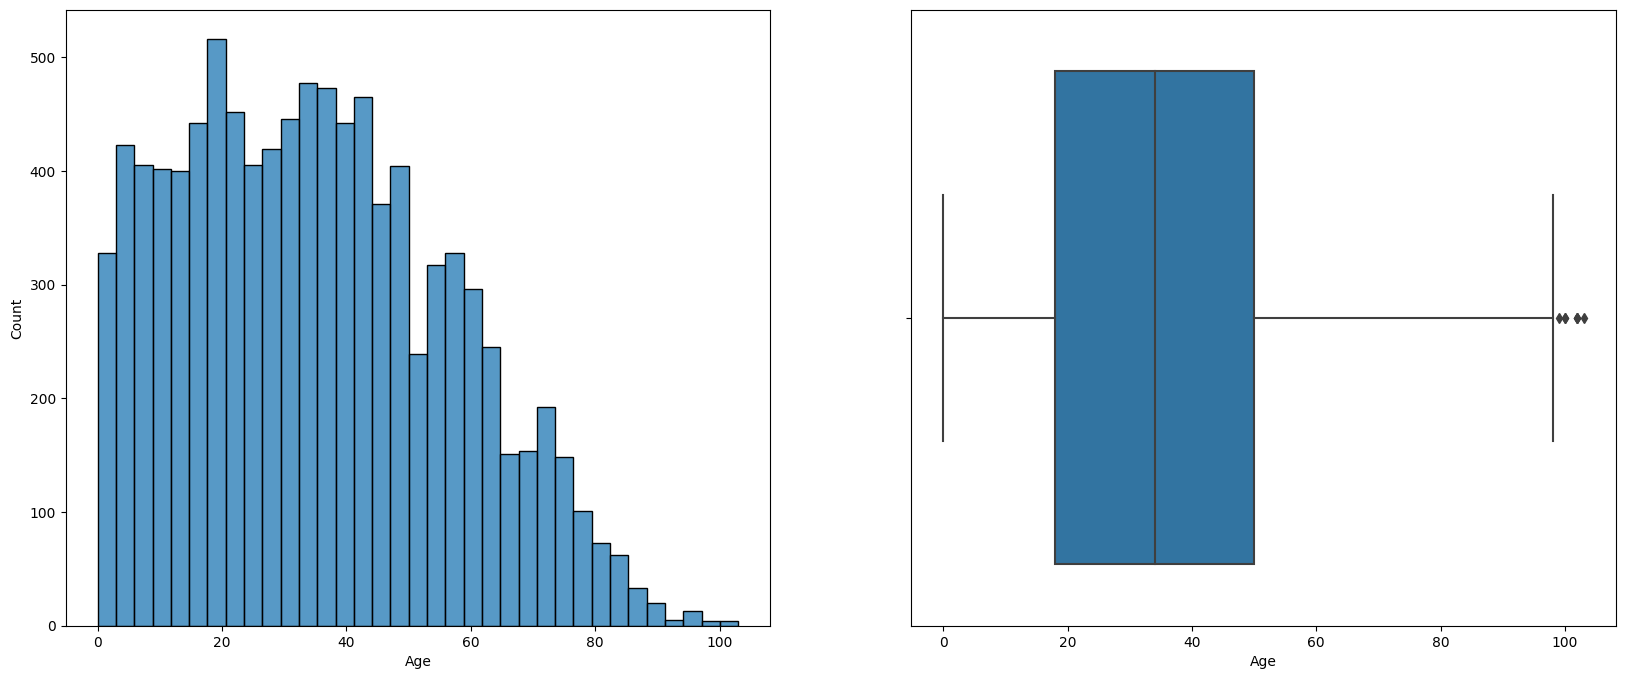

In [39]:
#Age distribution
fig, axes = plt.subplots(figsize=(20,8), ncols=2, nrows=1)

ax1 = sns.histplot(df['Age'], ax=axes[0])
ax2 = sns.boxplot(x='Age', data=df, ax=axes[1])

plt.show()

In [40]:
df['Age'].isna().sum()

0

In [41]:
df.loc[df['Age'] == ' ', 'Age'].sum()

0

`Age` is hereby cleaned.

### Relationship to Head of House:

In [42]:
df['Relationship to Head of House'].unique()

array(['Head', 'None', 'Daughter', 'Son', 'Husband', 'Partner', 'Wife',
       'Lodger', 'Grandson', 'Granddaughter', 'Sibling', 'Adopted Son',
       'Nephew', 'Neice', 'Step-Son', 'Visitor', 'Cousin',
       'Step-Daughter', 'Adopted Grandson', 'Adopted Daughter',
       'Adopted Granddaughter', 'Daughter-in-law', ' '], dtype=object)

In [43]:
df['Relationship to Head of House'].isna().sum()

0

#### Observations:
Here, we see `None` values and `empty` data entries.

In [44]:
df.loc[df['Relationship to Head of House'] == ' ', 'Relationship to Head of House'].value_counts()

     1
Name: Relationship to Head of House, dtype: int64

In [45]:
df.loc[df['Relationship to Head of House'] == ' ']

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6030,29,Randall Throughway,Shaun,Jones,76,,Married,Male,Retired Media buyer,None,None


To ascertain the Relationship of this entry to Head of House, I check the data entered for people living in the same address as them and in relation to the Last Name.

In [46]:
df.loc[(df['House Number'] == 29) & (df['Last Name'] == 'Jones') & (df['Street'] == 'Randall Throughway')]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6029,29,Randall Throughway,Katherine,Jones,74,Head,Married,Female,Retired Housing manager/officer,None,None
6030,29,Randall Throughway,Shaun,Jones,76,,Married,Male,Retired Media buyer,None,None


Here, I see the age group and occupation. With the woman being the `Head` here, The man with the data entry empty certainly is the Husband. Hence I replaced the empty data in that column with `Husband`

In [47]:
df.loc[df['Relationship to Head of House'] == ' ', 'Relationship to Head of House'] = 'Husband'

In [48]:
df.loc[df['Relationship to Head of House'] == ' ', 'Relationship to Head of House'].sum()

0

We move to `None` values.

In [49]:
df.loc[df['Relationship to Head of House'] == 'None', 'Relationship to Head of House'].value_counts()

None    705
Name: Relationship to Head of House, dtype: int64

`705` entries with `None` value. To ascertain the consistency of this data, I check `Age` column. According to the assignment, anyone older than 18 can be 'Head'. However, I also need to be sure I am not ascribing two Heads to a household.

In [50]:
df.loc[(df['Relationship to Head of House'] == 'None') & (df['Age'] >= 18), 'Relationship to Head of House'].value_counts()

None    698
Name: Relationship to Head of House, dtype: int64

In [51]:
df.loc[(df['Relationship to Head of House'] == 'None') & (df['Age'] >= 18)]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Orryjar Lane,Abdul,Pickering,43,None,Single,Male,Public relations account executive,None,Christian
5,4,Orryjar Lane,Phillip,Dale,52,None,Single,Male,Retail merchandiser,None,Christian
29,15,Orryjar Lane,Frederick,Thomas,46,None,Single,Male,Scientific laboratory technician,None,Jewish
30,15,Orryjar Lane,Charles,Holmes,49,None,Single,Male,Cabin crew,None,Catholic
64,27,Orryjar Lane,Simon,Atkinson,19,None,Single,Male,University Student,None,Methodist
...,...,...,...,...,...,...,...,...,...,...,...
9510,4,Protectorate Skyway,Jeremy,Shaw,60,None,Single,Male,Chief Executive Officer,None,Christian
9511,4,Protectorate Skyway,Conor,Owen,47,None,Single,Male,Dance movement psychotherapist,None,Methodist
9512,4,Protectorate Skyway,Jodie,Webb,26,None,Single,Female,Agricultural consultant,None,Catholic
9513,4,Protectorate Skyway,Joshua,Barnes,56,None,Single,Male,"Sales professional, IT",None,Christian


In [52]:
df.loc[(df['Relationship to Head of House'] == 'None') & (df['Age'] < 18)]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1875,28,Hodgson Mountain,Leigh,Tucker,15,None,NaN,Male,Student,None,NaN
2598,43,Barrett Circles,Carole,Wilson,10,None,NaN,Female,Student,None,NaN
2599,43,Barrett Circles,Nathan,Anderson-Wilson,9,None,NaN,Male,Student,None,NaN
4404,15,Todd Canyon,Laura,Ward,9,None,NaN,Female,Student,None,NaN
4405,15,Todd Canyon,Clifford,Ward,7,None,NaN,Male,Student,None,NaN
4406,15,Todd Canyon,Jemma,Ward,3,None,NaN,Female,Child,None,NaN
4407,15,Todd Canyon,Kimberley,Ward,3,None,NaN,Female,Child,None,NaN


People here are either children or students and so they could be categorised as `Daughter` or `Son`

In [53]:
df.loc[(df['Street'] == 'Hodgson Mountain') & (df['House Number'] == 28) & (df['Last Name'] == 'Tucker')]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1873,28,Hodgson Mountain,Clive,Tucker,52,None,Married,Male,Commercial art gallery manager,None,Christian
1874,28,Hodgson Mountain,Beth,Tucker,51,None,Married,Female,Geographical information systems officer,None,Christian
1875,28,Hodgson Mountain,Leigh,Tucker,15,None,NaN,Male,Student,None,NaN


In [54]:
df.loc[(df['Street'] == 'Hodgson Mountain')& (df['Last Name'] == 'Tucker')]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1873,28,Hodgson Mountain,Clive,Tucker,52,None,Married,Male,Commercial art gallery manager,None,Christian
1874,28,Hodgson Mountain,Beth,Tucker,51,None,Married,Female,Geographical information systems officer,None,Christian
1875,28,Hodgson Mountain,Leigh,Tucker,15,None,NaN,Male,Student,None,NaN


Here we see that the `Tucker` family have `Relationship to Head of House` as None. Hence this will be filled appropraitely.

In [55]:
df.loc[(df['Street'] == 'Hodgson Mountain')& (df['Last Name'] == 'Tucker') & (df['Age'] < 18), 'Relationship to Head of House'] = 'Son'

In [56]:
df.loc[(df['Street'] == 'Hodgson Mountain')& (df['Last Name'] == 'Tucker')]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1873,28,Hodgson Mountain,Clive,Tucker,52,None,Married,Male,Commercial art gallery manager,None,Christian
1874,28,Hodgson Mountain,Beth,Tucker,51,None,Married,Female,Geographical information systems officer,None,Christian
1875,28,Hodgson Mountain,Leigh,Tucker,15,Son,NaN,Male,Student,None,NaN


And the `Male` as `Head`, and the Female as `Wife`

In [57]:
df.loc[(df['Street'] == 'Hodgson Mountain')& (df['Last Name'] == 'Tucker') & (df['Age'] > 18) & (df['Gender'] == 'Male'), 'Relationship to Head of House'] = 'Head'

df.loc[(df['Street'] == 'Hodgson Mountain')& (df['Last Name'] == 'Tucker') & (df['Age'] > 18) & (df['Gender'] == 'Female'), 'Relationship to Head of House'] = 'Wife'

In [58]:
df.loc[(df['Street'] == 'Hodgson Mountain')& (df['Last Name'] == 'Tucker')]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1873,28,Hodgson Mountain,Clive,Tucker,52,Head,Married,Male,Commercial art gallery manager,None,Christian
1874,28,Hodgson Mountain,Beth,Tucker,51,Wife,Married,Female,Geographical information systems officer,None,Christian
1875,28,Hodgson Mountain,Leigh,Tucker,15,Son,NaN,Male,Student,None,NaN


In [59]:
df.loc[(df['Relationship to Head of House'] == 'None') & (df['Age'] < 18)]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2598,43,Barrett Circles,Carole,Wilson,10,None,NaN,Female,Student,None,NaN
2599,43,Barrett Circles,Nathan,Anderson-Wilson,9,None,NaN,Male,Student,None,NaN
4404,15,Todd Canyon,Laura,Ward,9,None,NaN,Female,Student,None,NaN
4405,15,Todd Canyon,Clifford,Ward,7,None,NaN,Male,Student,None,NaN
4406,15,Todd Canyon,Jemma,Ward,3,None,NaN,Female,Child,None,NaN
4407,15,Todd Canyon,Kimberley,Ward,3,None,NaN,Female,Child,None,NaN


In [60]:
df.loc[(df['Street'] == 'Todd Canyon') &(df['House Number'] == 15) & (df['Last Name'] == 'Ward')]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4402,15,Todd Canyon,Donna,Ward,49,None,Married,Female,Corporate investment banker,None,None
4403,15,Todd Canyon,Keith,Ward,54,None,Married,Male,Retail buyer,None,None
4404,15,Todd Canyon,Laura,Ward,9,None,NaN,Female,Student,None,NaN
4405,15,Todd Canyon,Clifford,Ward,7,None,NaN,Male,Student,None,NaN
4406,15,Todd Canyon,Jemma,Ward,3,None,NaN,Female,Child,None,NaN
4407,15,Todd Canyon,Kimberley,Ward,3,None,NaN,Female,Child,None,NaN


We see here the data of the family of `Ward` and so the data would be cleaned appropraitely.

In [61]:
df.loc[(df['Street'] == 'Todd Canyon') &(df['House Number'] == 15) & (df['Last Name'] == 'Ward') & (df['Age'] > 18) & (df['Gender'] == 'Male'), 'Relationship to Head of House'] = 'Head'

df.loc[(df['Street'] == 'Todd Canyon') &(df['House Number'] == 15) & (df['Last Name'] == 'Ward') & (df['Age'] > 18) & (df['Gender'] == 'Female'), 'Relationship to Head of House'] = 'Wife'

In [62]:
df.loc[(df['Street'] == 'Todd Canyon') &(df['House Number'] == 15) & (df['Last Name'] == 'Ward')]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4402,15,Todd Canyon,Donna,Ward,49,Wife,Married,Female,Corporate investment banker,None,None
4403,15,Todd Canyon,Keith,Ward,54,Head,Married,Male,Retail buyer,None,None
4404,15,Todd Canyon,Laura,Ward,9,None,NaN,Female,Student,None,NaN
4405,15,Todd Canyon,Clifford,Ward,7,None,NaN,Male,Student,None,NaN
4406,15,Todd Canyon,Jemma,Ward,3,None,NaN,Female,Child,None,NaN
4407,15,Todd Canyon,Kimberley,Ward,3,None,NaN,Female,Child,None,NaN


In [63]:
df.loc[(df['Street'] == 'Todd Canyon') &(df['House Number'] == 15) & (df['Last Name'] == 'Ward') & (df['Age'] < 18) & (df['Gender'] == 'Male'), 'Relationship to Head of House'] = 'Son'

df.loc[(df['Street'] == 'Todd Canyon') &(df['House Number'] == 15) & (df['Last Name'] == 'Ward') & (df['Age'] < 18) & (df['Gender'] == 'Female'), 'Relationship to Head of House'] = 'Daughter'

In [64]:
df.loc[(df['Street'] == 'Todd Canyon') &(df['House Number'] == 15) & (df['Last Name'] == 'Ward')]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4402,15,Todd Canyon,Donna,Ward,49,Wife,Married,Female,Corporate investment banker,None,None
4403,15,Todd Canyon,Keith,Ward,54,Head,Married,Male,Retail buyer,None,None
4404,15,Todd Canyon,Laura,Ward,9,Daughter,NaN,Female,Student,None,NaN
4405,15,Todd Canyon,Clifford,Ward,7,Son,NaN,Male,Student,None,NaN
4406,15,Todd Canyon,Jemma,Ward,3,Daughter,NaN,Female,Child,None,NaN
4407,15,Todd Canyon,Kimberley,Ward,3,Daughter,NaN,Female,Child,None,NaN


In [65]:
df.loc[(df['Relationship to Head of House'] == 'None') & (df['Age'] < 18)]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2598,43,Barrett Circles,Carole,Wilson,10,None,NaN,Female,Student,None,NaN
2599,43,Barrett Circles,Nathan,Anderson-Wilson,9,None,NaN,Male,Student,None,NaN


In [66]:
df.loc[(df['Street'] == 'Barrett Circles') & (df['House Number'] == 43) ]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2594,43,Barrett Circles,Joseph,Smith,74,Head,Married,Male,Retired Theme park manager,None,Christian
2595,43,Barrett Circles,Sylvia,Smith,72,Wife,Married,Female,Retired Operational researcher,None,Christian
2596,43,Barrett Circles,Patricia,Wilson,40,None,Married,Female,Animal technologist,None,Catholic
2597,43,Barrett Circles,Malcolm,Wilson,41,None,Married,Male,Fish farm manager,None,None
2598,43,Barrett Circles,Carole,Wilson,10,None,NaN,Female,Student,None,NaN
2599,43,Barrett Circles,Nathan,Anderson-Wilson,9,None,NaN,Male,Student,None,NaN


`Wilson Family`. `Nathan` would be the adopted son because of the name he bears. Others will have relationships as deemed fit in a family structure.

In [67]:
df.loc[(df['Street'] == 'Barrett Circles') &(df['House Number'] == 43) & (df['Last Name'] == 'Wilson') & (df['Age'] > 18) & (df['Gender'] == 'Male'), 'Relationship to Head of House'] = 'Head'

df.loc[(df['Street'] == 'Barrett Circles') &(df['House Number'] == 43) & (df['Last Name'] == 'Wilson') & (df['Age'] > 18) & (df['Gender'] == 'Female'), 'Relationship to Head of House'] = 'Wife'

In [68]:
df.loc[(df['Street'] == 'Barrett Circles') & (df['House Number'] == 43) ]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2594,43,Barrett Circles,Joseph,Smith,74,Head,Married,Male,Retired Theme park manager,None,Christian
2595,43,Barrett Circles,Sylvia,Smith,72,Wife,Married,Female,Retired Operational researcher,None,Christian
2596,43,Barrett Circles,Patricia,Wilson,40,Wife,Married,Female,Animal technologist,None,Catholic
2597,43,Barrett Circles,Malcolm,Wilson,41,Head,Married,Male,Fish farm manager,None,None
2598,43,Barrett Circles,Carole,Wilson,10,None,NaN,Female,Student,None,NaN
2599,43,Barrett Circles,Nathan,Anderson-Wilson,9,None,NaN,Male,Student,None,NaN


In [69]:
df.loc[(df['Street'] == 'Barrett Circles') &(df['House Number'] == 43) & (df['Last Name'] == 'Wilson') & (df['Age'] < 18) & (df['Gender'] == 'Female'), 'Relationship to Head of House'] = 'Daughter'

df.loc[(df['Street'] == 'Barrett Circles') &(df['House Number'] == 43) & (df['Last Name'].str.contains('Wilson')) & (df['Age'] < 18) & (df['Gender'] == 'Male'), 'Relationship to Head of House'] = 'Adopted Son'

In [70]:
df.loc[(df['Street'] == 'Barrett Circles') & (df['House Number'] == 43)]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2594,43,Barrett Circles,Joseph,Smith,74,Head,Married,Male,Retired Theme park manager,None,Christian
2595,43,Barrett Circles,Sylvia,Smith,72,Wife,Married,Female,Retired Operational researcher,None,Christian
2596,43,Barrett Circles,Patricia,Wilson,40,Wife,Married,Female,Animal technologist,None,Catholic
2597,43,Barrett Circles,Malcolm,Wilson,41,Head,Married,Male,Fish farm manager,None,None
2598,43,Barrett Circles,Carole,Wilson,10,Daughter,NaN,Female,Student,None,NaN
2599,43,Barrett Circles,Nathan,Anderson-Wilson,9,Adopted Son,NaN,Male,Student,None,NaN


In [71]:
df.loc[(df['Relationship to Head of House'] == 'None') & (df['Age'] < 18), 'Relationship to Head of House'].sum()

0

`Relationship to Head of House` with `None` values that have ages less than 18 are thus cleaned.

In [72]:
df.loc[(df['Relationship to Head of House'] == 'None') & (df['Age'] >= 18), 'Relationship to Head of House'].value_counts()

None    692
Name: Relationship to Head of House, dtype: int64

In [73]:
df['Relationship to Head of House'].isna().sum()

0

In [74]:
#We move to cleaning other None values later.

In [75]:
df.loc[(df['Relationship to Head of House'] == 'Head') & (df['Age'] < 18)]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2229,26,Wembley Junction,Heather,Begum-Jones,16,Head,Divorced,f,Unemployed,None,NaN
3958,36,Lynch Streets,Reece,Farmer,16,Head,Divorced,Male,Unemployed,None,NaN
4679,17,Pinewood Course,Amber,Roberts,16,Head,Divorced,Female,Student,None,NaN


In [76]:
df.loc[ (df['Last Name'] == "Begum-Jones")]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2229,26,Wembley Junction,Heather,Begum-Jones,16,Head,Divorced,f,Unemployed,None,NaN
2230,26,Wembley Junction,Brian,Begum-Jones,0,Son,NaN,Male,Child,None,NaN


In [77]:
df = df.drop(labels=[2229, 2230])

In [78]:
df.loc[ (df['Last Name'] == "Farmer") & (df['Street'] == 'Lynch Streets') & (df['House Number'] == 36)]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3958,36,Lynch Streets,Reece,Farmer,16,Head,Divorced,Male,Unemployed,None,NaN
3959,36,Lynch Streets,Terry,Farmer,0,Son,NaN,Male,Child,None,NaN


In [79]:
df.loc[ (df['Last Name'] == "Roberts") & (df['Street'] == 'Pinewood Course') & (df['House Number'] == 17)]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4679,17,Pinewood Course,Amber,Roberts,16,Head,Divorced,Female,Student,None,NaN
4680,17,Pinewood Course,Cameron,Roberts,0,Son,NaN,Male,Child,None,NaN


In [80]:

df = df.drop(labels=[3958, 3959, 4679, 4680])


In [81]:
df.loc[(df['Relationship to Head of House'] == 'Head') & (df['Age'] < 18), 'Relationship to Head of House'].sum()

0

### Marital Status:

In [82]:
df['Marital Status'].unique()

array(['Single', 'Divorced', 'Married', nan, 'Widowed', 'W', 'M', 'D',
       'S'], dtype=object)

In [83]:
df['Marital Status'].value_counts()

Single      3464
Married     2490
Divorced     903
Widowed      389
W              5
M              2
D              1
S              1
Name: Marital Status, dtype: int64

In [84]:
df['Marital Status'].isna().sum()

2394

#### Observations: 

There is a lack of consistency in the way data was recorded. `M` , `W`, `D`, `S` are all supposed to be in words. Also, there are `nan` values

In [85]:
df.loc[df['Marital Status'] == 'M', 'Marital Status'] = 'Married'
df.loc[df['Marital Status'] == 'S', 'Marital Status'] = 'Single'
df.loc[df['Marital Status'] == 'D', 'Marital Status'] = 'Divorced'
df.loc[df['Marital Status'] == 'W', 'Marital Status'] = 'Widowed'


In [86]:
df['Marital Status'].unique()

array(['Single', 'Divorced', 'Married', nan, 'Widowed'], dtype=object)

checking the Age of those with `Marital Status` as `nan`

In [87]:
df.loc[(df['Marital Status'].isna()) & (df['Age'] < 18), 'Age'].count()

2394

All Entires with 'Marital status' as `Nan` have Ages less than 18. Under the law, it is unacceptable for people less than 18 to be legally married. Therefore, they'd be cleaned as `Minor`

In [88]:
df['Marital Status'].fillna('Minor', inplace=True)

In [89]:
df.loc[(df['Marital Status'] == 'Divorced') & (df['Age'] < 18)]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


A major inconsistency here is that we have divorced values for ages less 18 which is not legal. These are minors and cannot be married let alone divorced.

In [90]:
df.loc[(df['Marital Status'] == 'Divorced') & (df['Age'] < 18), 'Marital Status'] = 'Minor'

In [91]:
df.loc[(df['Marital Status'] == 'Married') & (df['Age'] < 18)]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [92]:
df.loc[(df['Marital Status'] == 'Widowed') & (df['Age'] < 18)]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [93]:
df['Marital Status'].value_counts()

Single      3465
Married     2492
Minor       2394
Divorced     904
Widowed      394
Name: Marital Status, dtype: int64

In [94]:
df['Marital Status'].unique()

array(['Single', 'Divorced', 'Married', 'Minor', 'Widowed'], dtype=object)

`Marital Status` is thus cleaned.

### Gender:

In [95]:
df['Gender'].value_counts()

Female    4982
Male      4494
male        93
f           34
female      20
M           15
F            7
m            4
Name: Gender, dtype: int64

In [96]:
df['Gender'].unique()

array(['Male', 'Female', 'male', 'M', 'f', 'female', 'm', 'F'],
      dtype=object)

#### Observations:

Here, again, there are inconsistencies in the way the data was recorded. The Abbreviations and discrepancy in the use of Upper case letter would be cleaned out.

In [97]:
df.loc[(df['Gender'] == 'M') | (df['Gender'] == 'm') | (df['Gender'] == 'male'), 'Gender'] = 'Male'
df.loc[(df['Gender'] == 'F') | (df['Gender'] == 'f') | (df['Gender'] == 'female'), 'Gender'] = 'Female'

In [98]:
df['Gender'].value_counts()

Female    5043
Male      4606
Name: Gender, dtype: int64

In [99]:
df.loc[df['Gender'] == ' ', 'Gender'].sum()

0

In [100]:
df['Gender'].isna().sum()

0

`Gender` is thus cleaned.

### Occupation:

In [101]:
df['Occupation'].unique()

array(['Careers adviser', 'Public relations account executive',
       'Meteorologist', ..., 'Retired Architectural technologist',
       'Retired Geographical information systems officer',
       'Retired Physiological scientist'], dtype=object)

In [102]:
df['Occupation'].value_counts()

Student                                 1934
University Student                       651
Unemployed                               608
Child                                    594
Volunteer coordinator                     18
                                        ... 
Retired Economist                          1
Retired Research scientist (maths)         1
Retired Conservation officer, nature       1
Retired Merchant navy officer              1
Retired Physiological scientist            1
Name: Occupation, Length: 1098, dtype: int64

In [103]:
df.loc[df['Occupation']==' ']

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5664,6,Newcastle Pine,Timothy,Yates,25,Head,Single,Male,,None,None
9610,1,Lyons Abbey,Beverley,Evans,39,Daughter,Single,Female,,None,None


For those where the Occupation is blank, this could be classified as `Unknown` as we do not know the Occupation.

In [104]:
df.loc[df['Occupation']==' ', 'Occupation'] = 'Unknown'

In [105]:
df.loc[df['Occupation']==' ', 'Occupation'].sum()

0

#### Observations: 

The individual occupations are somewhat irrelevant to our analysis as what we really need is the number of those `employed`, `unemployed`, `Student`, `Retired` and `Child`. So I either create a column with the heading `Employment status` and populate using value counts from `Occupation` or rename `Occupation` and clean appropraitely. 

A different column with `Employment Status` is much more appropraite. This would be done using `numpy`. All individual occupations without 'Retired' as a prefix or as part of the name is classified as `Employed`. Those with `Retired` as a prefix, suffix or as a part of the name is `Retired`, `Child` remains as `Child`, `University Student` and `Student` remains too.

In [106]:
# df.loc[df['Occupation'].str.contains('Retired'), 'Occupation'].count()


df.loc[~(df['Occupation'].str.contains('Student')) & 
       ~(df['Occupation'].str.contains('Retired')) &
       ~(df['Occupation'].str.contains('University Student')) &
       ~(df['Occupation'].str.contains('PhD')) &
       ~(df['Occupation'].str.contains('Unemployed')) &
        ~(df['Occupation'].str.contains('Child')), 'Occupation'].count()

5067

In [107]:
df.loc[(df['Occupation'].str.contains('Child psychotherapist')) |
       (df['Occupation'].str.contains('Psychotherapist, child')), 
       'Occupation'].count()

17

In [108]:
# np.where(condition, value if condition
# is true, value if condition is false)

df['Employment Status'] = np.where(df['Occupation'].str.contains('Unemployed', case=False), 'Unemployed', 'Employed')
df['Employment Status'] = np.where(df['Occupation'].str.contains('Unknown', case=False), 'Unemployed', 'Employed')
df['Employment Status'] = np.where(df['Occupation'].str.contains('student', case=False), "Student", df['Employment Status'])
df['Employment Status'] = np.where(df['Occupation'].str.contains('phd', case=False), "University Student", df['Employment Status'])
df['Employment Status'] = np.where((df['Occupation'].str.contains('university', case=False)) & (df['Employment Status']=='Student') , "University Student", df['Employment Status'])
df['Employment Status'] = np.where(df['Occupation']=='Child', "Child", df['Employment Status'])
df['Employment Status'] = np.where(df['Occupation'].str.contains('retired', case=False), "Retired", df['Employment Status'])

In [109]:
df['Employment Status'].unique()

array(['Employed', 'University Student', 'Student', 'Retired', 'Child',
       'Unemployed'], dtype=object)

In [110]:
df['Employment Status'].value_counts()

Employed              5680
Student               1934
Retired                771
University Student     668
Child                  594
Unemployed               2
Name: Employment Status, dtype: int64

`Employment Status` column is thus created and will assit us in our analysis


### Infirmity:

In [111]:
df['Infirmity'].unique()

array(['None', 'Deaf', 'Physical Disability', 'Unknown Infection', ' ',
       'Disabled', 'Mental Disability', 'Blind'], dtype=object)

In [112]:
df['Infirmity'].isna().sum()

0

#### Observations:
There are empty entries and None entires in the data.

In [113]:
df.loc[df['Infirmity'] == ' ']

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
393,64,West Road,Ruth,Mills,35,Daughter,Single,Female,Investment analyst,,Methodist,Employed
1412,29,Spider Avenue,Alexandra,Thompson,34,Wife,Married,Female,"Therapist, art",,None,Employed
1748,12,Ball Rest,Sharon,Chapman,24,None,Single,Female,"Presenter, broadcasting",,Catholic,Employed
2964,93,Barrett Circles,Josephine,Baxter,11,Daughter,Minor,Female,Student,,NaN,Student
3130,124,Barrett Circles,Dylan,Mason,22,Son,Single,Male,Games developer,,None,Employed
4192,26,Rogers Field,Laura,King,47,Head,Single,Female,Archaeologist,,Christian,Employed
6464,16,Roberts Crescent,Shane,Taylor,60,Partner,Single,Male,Museum/gallery curator,,Methodist,Employed
6876,3,Ring Street,Conor,Peters,68,Head,Widowed,Male,Retired Secretary/administrator,,Christian,Retired
6908,10,Ring Street,Sam,Roberts,9,Son,Minor,Male,Student,,NaN,Student
7288,11,Pendragon Avenue,Beth,Smith,28,Lodger,Single,Female,Public relations officer,,None,Employed


In [114]:
df.loc[df['Infirmity'] == 'None', 'Infirmity'].value_counts()

None    9557
Name: Infirmity, dtype: int64

It is safe to assume that those with empty and `None` entries in infirmity have no Illnesses or `Disability` at all. Thus it shall be cleaned as such.

In [115]:
df.loc[(df['Infirmity'] == 'None') | (df['Infirmity'] == ' '), 'Infirmity'] = 'No Disability'

In [116]:
df['Infirmity'].unique()

array(['No Disability', 'Deaf', 'Physical Disability',
       'Unknown Infection', 'Disabled', 'Mental Disability', 'Blind'],
      dtype=object)

In [117]:
df['Infirmity'].value_counts()

No Disability          9573
Physical Disability      24
Disabled                 14
Deaf                     12
Blind                    12
Unknown Infection         7
Mental Disability         7
Name: Infirmity, dtype: int64

`Infirmity` is thus cleaned.

### Religion: 

In [118]:
df['Religion'].unique()

array(['Catholic', 'Christian', 'None', nan, 'Jewish', 'Methodist',
       'Sikh', 'Muslim', 'Orthodoxy', 'Agnostic', 'Private', 'Quaker',
       ' ', 'Pagan'], dtype=object)

In [119]:
df['Religion'].value_counts()

None         3068
Christian    2192
Catholic      987
Methodist     659
Muslim        152
Sikh           68
Jewish         53
                4
Quaker          2
Orthodoxy       1
Agnostic        1
Private         1
Pagan           1
Name: Religion, dtype: int64

In [120]:
df['Religion'].isna().sum()

2460

#### Observations:

If Religion is `None` and Age is greater than 18, they may be `Atheist` or `Agnostic`. However, since there is no further data to determine their lack of believe in the existence of God, ie "Atheism", it may be safe to categorise them as `Agnostic`. 

Further ponder into the meaning of the word `Agnostic` suggests that `Agnostics` assert that it is impossible to know how the universe was created and whether or not divine beings exist. 

Because we don't have enough data to assert the religion of People in this category, It is best to categorise them as `No religion` or `Irreligious`

References:
__[Agnostic vs Atheist](https://www.dictionary.com/e/atheism-agnosticism/)__

In [121]:
df.loc[(df['Religion'] == 'None') & (df['Age'] > 18), 'Religion'] = 'No Religion'

In [122]:
df['Religion'].value_counts()

No Religion    3018
Christian      2192
Catholic        987
Methodist       659
Muslim          152
Sikh             68
Jewish           53
None             50
                  4
Quaker            2
Orthodoxy         1
Agnostic          1
Private           1
Pagan             1
Name: Religion, dtype: int64

For Age less than 18, it is safe is attribute their parents religion to that group. So if Religion is `None`, Age is less than 18, Relationship to Head of House is `Child` , One might want to check the Street House Number, surnames and the relationships to head of house is `Head`, we might want to assume that the kids would inherit their parents' religions. However for `2400` entries, filtering by these variables would take a lot of time and might affect the quality of the data.

In [123]:
((df['Religion'].isna()) & (df['Age'] < 18)).sum()

2394

In [124]:
#Check for Age less than 18

df.loc[(df['Religion'].isna()) & (df['Age'] < 18)].head(10)

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
12,7,Orryjar Lane,Claire,Young,13,Daughter,Minor,Female,Student,No Disability,NaN,Student
13,7,Orryjar Lane,Ellie,Young,11,Daughter,Minor,Female,Student,No Disability,NaN,Student
14,7,Orryjar Lane,Rhys,Young,9,Son,Minor,Male,Student,No Disability,NaN,Student
42,19,Orryjar Lane,Annette,Khan,14,Daughter,Minor,Female,Student,No Disability,NaN,Student
44,20,Orryjar Lane,Joseph,Fox,16,Son,Minor,Male,Student,No Disability,NaN,Student
51,22,Orryjar Lane,Alex,Roberts-Taylor,15,Son,Minor,Male,Student,No Disability,NaN,Student
57,25,Orryjar Lane,Wayne,Shah,5,Son,Minor,Male,Student,No Disability,NaN,Student
58,25,Orryjar Lane,Samantha,Shah,2,Daughter,Minor,Female,Child,No Disability,NaN,Child
59,25,Orryjar Lane,Phillip,Shah,2,Son,Minor,Male,Child,No Disability,NaN,Child
71,30,Orryjar Lane,Sam,Taylor,13,Son,Minor,Male,Student,No Disability,NaN,Student


In [125]:
df.loc[(df['Religion'] == 'Christian') 
       & (df['Age'] >= 18) 
       & (df['Last Name'] == 'Young')
       & (df['Relationship to Head of House'] == 'Head')
      & (df['Street'] == 'Orryjar Lane')] 

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
10,7,Orryjar Lane,Annette,Young,53,Head,Married,Female,Charity officer,No Disability,Christian,Employed


if empty values and Age is greater than 18, It is appropraite to categorise those as `No Religion`

In [126]:
df.head()

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
0,1,Orryjar Lane,Kieran,Ward,56,Head,Single,Male,Careers adviser,No Disability,Catholic,Employed
1,1,Orryjar Lane,Abdul,Pickering,43,None,Single,Male,Public relations account executive,No Disability,Christian,Employed
2,2,Orryjar Lane,Rosemary,Steele,30,Head,Single,Female,Meteorologist,No Disability,Christian,Employed
3,3,Orryjar Lane,Marilyn,Cooke,53,Head,Single,Female,Jewellery designer,No Disability,Christian,Employed
4,4,Orryjar Lane,Samantha,Coates,63,Head,Single,Female,Trade mark attorney,No Disability,No Religion,Employed


if empty values and Age is greater than 18, It is appropraite to categorise those as `No Religion`

In [127]:
df.loc[(df['Religion'] == ' ') & (df['Age'] >= 18),'Religion'] = 'No Religion'

In [128]:
df['Religion'].unique()

array(['Catholic', 'Christian', 'No Religion', nan, 'Jewish', 'Methodist',
       'None', 'Sikh', 'Muslim', 'Orthodoxy', 'Agnostic', 'Private',
       'Quaker', 'Pagan'], dtype=object)

In [129]:
df['Religion'].isna().sum()

2460

In [130]:
((df['Religion'].isna()) & (df['Age'] < 18)).sum()

2394

If Religion is 'NA' and Age is less than 18, leave as is. It is assumed that they are too young to have fully formed opinions on religion. Hence why the value is `NA`. If Age is greater than or equal to 18, however, they could be Agnostic or Atheists.

In [131]:
((df['Religion'].isna()) & (df['Age'] >= 18)).sum()


66

In [132]:
df.loc[(df['Religion'].isna()) & (df['Age'] >= 18),'Religion'] = 'Atheist'

In [133]:

((df['Religion'].isna()) & (df['Age'] >= 18)).sum()



0

In [134]:
((df['Religion'] == 'None') & (df['Age'] >= 18)).sum()



50

All None values belong to people older than 18. Again should they be categorised as Atheists, Agnostics or left as `None`. The question of knowing the value of `None` in a dataset arises yet again.

 Various articles I read about `None`, `NA` values suggests that haveing such values in data _might_ mean that such value is missing. Hence I am left with the Data Scientist in me to decide whether to set `None` as a more meaningful value such as `Agnostic` or `Atheist` or `Undecided`

In [135]:
df.loc[((df['Religion'] == 'None') & (df['Age'] >= 18)), 'Religion'] = 'Undecided' #or Undecided

In [136]:
# df['Religion'].replace(' ', 'Atheist', inplace=True)

df['Religion'].unique()


array(['Catholic', 'Christian', 'No Religion', nan, 'Jewish', 'Methodist',
       'Undecided', 'Sikh', 'Muslim', 'Atheist', 'Orthodoxy', 'Agnostic',
       'Private', 'Quaker', 'Pagan'], dtype=object)

In [137]:
((df['Religion'].isna()) & (df['Age'] < 18)).sum()

2394

2400 people who are under the age of 18(ie minors) have NA as the religion values. For clarity, they may be replaced with `Not Applicable` or `NA` 

In [138]:
df.loc[((df['Religion'].isna()) & (df['Age'] < 18)), 'Religion'] = 'NA'

In [139]:
df['Religion'].value_counts()

No Religion    3022
NA             2394
Christian      2192
Catholic        987
Methodist       659
Muslim          152
Sikh             68
Atheist          66
Jewish           53
Undecided        50
Quaker            2
Orthodoxy         1
Agnostic          1
Private           1
Pagan             1
Name: Religion, dtype: int64

In [140]:
df.loc[(df['Religion'] == 'NA')]

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
12,7,Orryjar Lane,Claire,Young,13,Daughter,Minor,Female,Student,No Disability,NA,Student
13,7,Orryjar Lane,Ellie,Young,11,Daughter,Minor,Female,Student,No Disability,NA,Student
14,7,Orryjar Lane,Rhys,Young,9,Son,Minor,Male,Student,No Disability,NA,Student
42,19,Orryjar Lane,Annette,Khan,14,Daughter,Minor,Female,Student,No Disability,NA,Student
44,20,Orryjar Lane,Joseph,Fox,16,Son,Minor,Male,Student,No Disability,NA,Student
...,...,...,...,...,...,...,...,...,...,...,...,...
9648,1,Memorial Citadel,Beverley,Smith,10,Daughter,Minor,Female,Student,No Disability,NA,Student
9649,1,Memorial Citadel,Dale,Smith,10,Son,Minor,Male,Student,No Disability,NA,Student
9651,1,Armagh Longhouse,Aaron,Yates,6,Son,Minor,Male,Student,No Disability,NA,Student
9652,1,Armagh Longhouse,Geraldine,Yates,3,Daughter,Minor,Female,Child,No Disability,NA,Child


In [141]:
df.head()

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
0,1,Orryjar Lane,Kieran,Ward,56,Head,Single,Male,Careers adviser,No Disability,Catholic,Employed
1,1,Orryjar Lane,Abdul,Pickering,43,None,Single,Male,Public relations account executive,No Disability,Christian,Employed
2,2,Orryjar Lane,Rosemary,Steele,30,Head,Single,Female,Meteorologist,No Disability,Christian,Employed
3,3,Orryjar Lane,Marilyn,Cooke,53,Head,Single,Female,Jewellery designer,No Disability,Christian,Employed
4,4,Orryjar Lane,Samantha,Coates,63,Head,Single,Female,Trade mark attorney,No Disability,No Religion,Employed


`Religion` is thus cleaned.

# Data Analysis

**Problem Questions:**

   1. **What should be built on an unoccupied plot of land that the local government wishes to 
       develop?**
         - High Density housing
         - Low Density housing
         - Train station
         - Religious building
         - Emergency medical building
          
         
   2. **Which one of the following options should be invested in?**
       - Employement and training
       - Old Age Care
       - Fund for schools
       - General Infrastructure

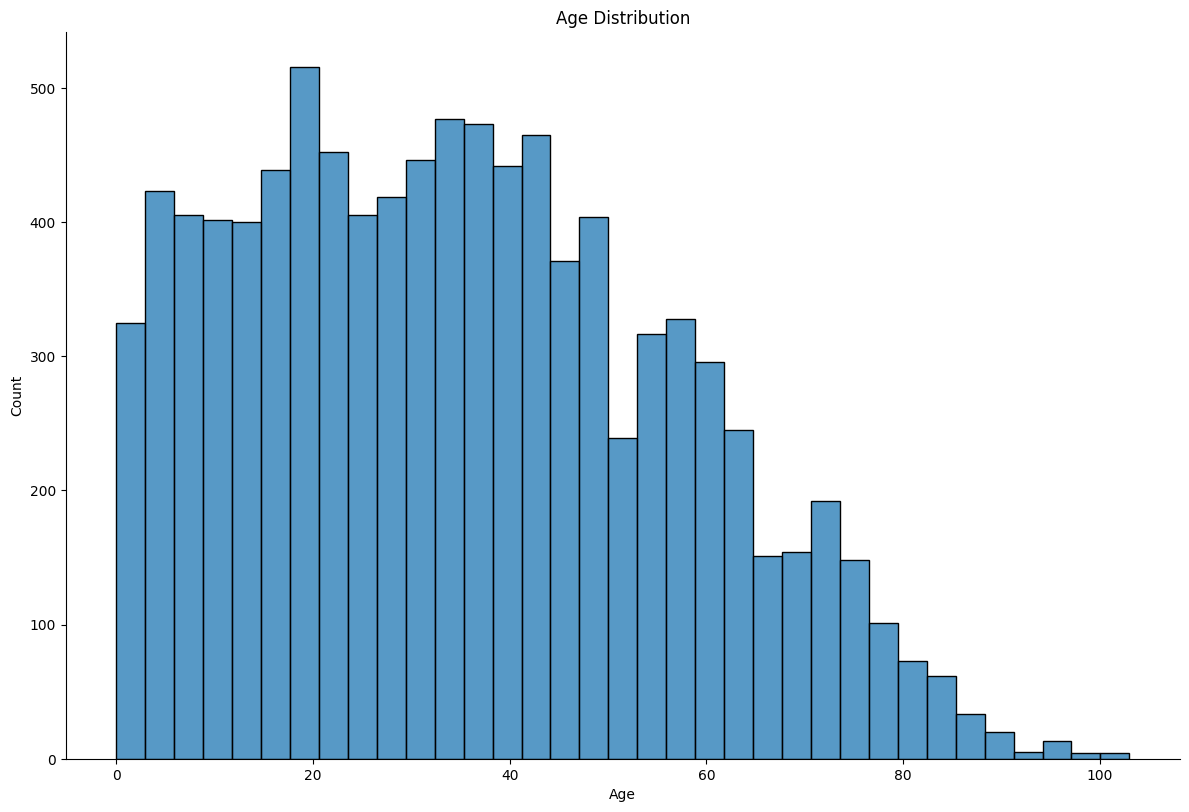

In [142]:
#Examining the Age Distribution
age_d = sns.displot(x='Age', data=df, height=8, aspect=1.5)
plt.title('Age Distribution')
age_d.savefig('./graphs/Age Distribution')
plt.show()


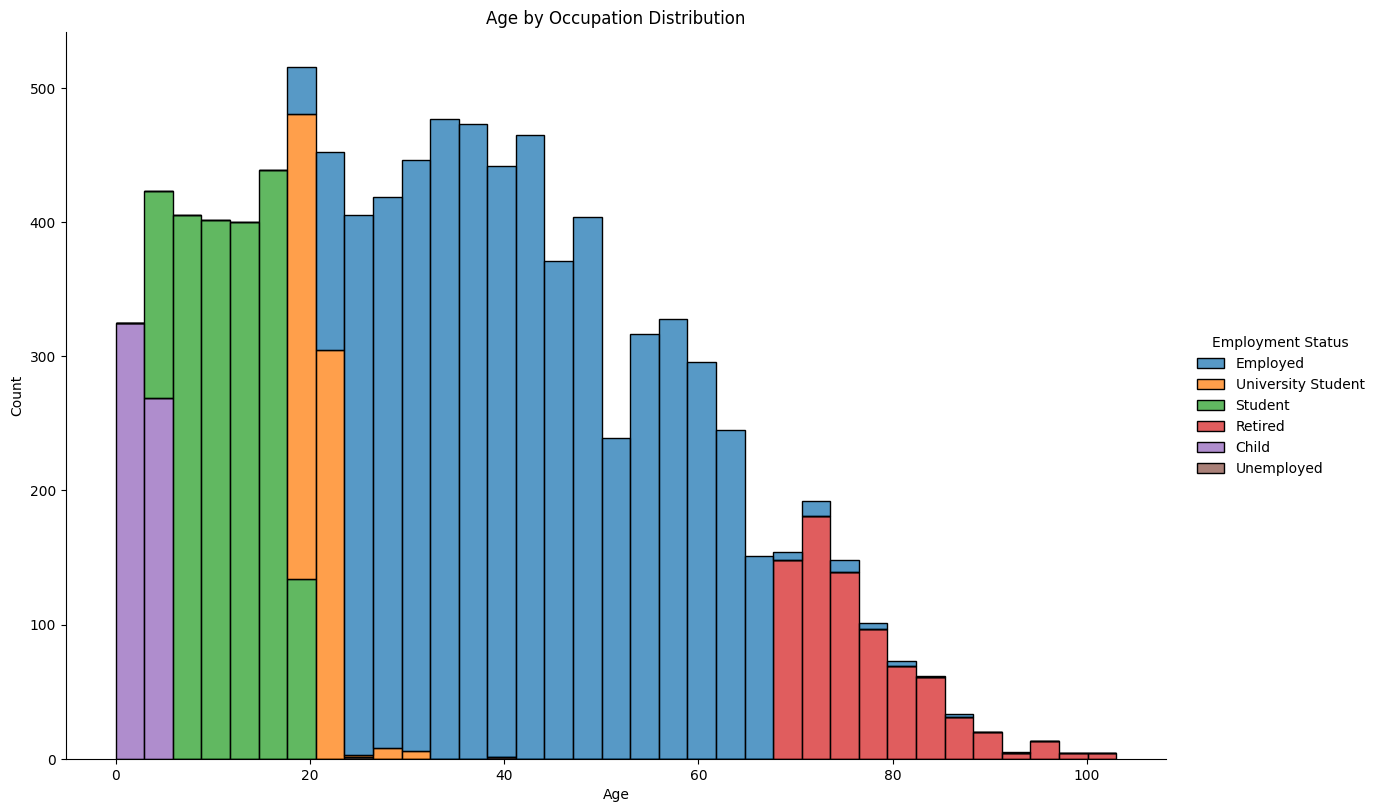

In [143]:
## Age distribution by Employment status
age_occupation = sns.displot(x='Age', data=df, hue='Employment Status', multiple='stack',height=8, aspect=1.5)
plt.title("Age by Occupation Distribution")
age_occupation.savefig('./graphs/Age-Occupation Distribution')
plt.show()

#### Age Pyramid:

What is an age pyramid? A population pyramid is a graph that shows the age and gender distribution of a given population. It’s useful for understanding the composition of a population and the trend in population growth.

To plot an age pyramid, the current data set needs to be re-structured to suit the data needed for a pyramid plot. Our current data set has `Male` and `Female` as values in a `Gender` column. So that needs to be filtered out and age groups categorised too.

In [144]:
#Sorting the age group
df['Age Group'] = np.where(df['Age'].between(0,5), "0-5", 0)
df['Age Group'] = np.where(df['Age'].between(6,10), "6-10", df['Age Group'])
df['Age Group'] = np.where(df['Age'].between(11,15), "11-15", df['Age Group'])
df['Age Group'] = np.where(df['Age'].between(16,20), "16-20", df['Age Group'])
df['Age Group'] = np.where(df['Age'].between(21,25), "21-25", df['Age Group'])
df['Age Group'] = np.where(df['Age'].between(26,30), "26-30", df['Age Group'])
df['Age Group'] = np.where(df['Age'].between(31,35), "31-35", df['Age Group'])
df['Age Group'] = np.where(df['Age'].between(36,40), "36-40", df['Age Group'])
df['Age Group'] = np.where(df['Age'].between(41,45), "41-45", df['Age Group'])
df['Age Group'] = np.where(df['Age'].between(46,50), "46-50", df['Age Group'])
df['Age Group'] = np.where(df['Age'].between(51,55), "51-55", df['Age Group'])
df['Age Group'] = np.where(df['Age'].between(56,60), "56-60", df['Age Group'])
df['Age Group'] = np.where(df['Age'].between(61,65), "61-65", df['Age Group'])
df['Age Group'] = np.where(df['Age'].between(65,70), "66-70", df['Age Group'])
df['Age Group'] = np.where(df['Age'].between(71,75), "71-75", df['Age Group'])
df['Age Group'] = np.where(df['Age'].between(76,80), "76-80", df['Age Group'])
df['Age Group'] = np.where(df['Age'].between(81,85), "81-85", df['Age Group'])
df['Age Group'] = np.where(df['Age'].between(86,90), "86-90", df['Age Group'])
df['Age Group'] = np.where(df['Age']>90, "90+", df['Age Group'])

In [145]:
#filtering dataframe by gender:

female = df.loc[df['Gender'] == 'Female']
male = df.loc[df['Gender'] == 'Male'] 

In [146]:

male_df = male.groupby(['Age Group']).agg(Male = 
                                          pd.NamedAgg(column='Age Group', aggfunc='count'),
                                          MedianAge=pd.NamedAgg(column='Age', aggfunc='median')
                                         ).sort_values(by='MedianAge', ascending=False).reset_index()

male_df['Male'] = male_df['Male']*-1

#female

female_df = female.groupby(['Age Group']).agg(Female = 
                                              pd.NamedAgg(column='Age Group', aggfunc='count'),
                                               MedianAge=pd.NamedAgg(column='Age', aggfunc='median')
                                             ).sort_values(by='MedianAge', ascending=False).reset_index()

#merging data frames

pyramid_df = male_df.merge(female_df, on = 'Age Group')[['Age Group', 'Male', 'Female']]

#age group
AgeGroupClass = pyramid_df['Age Group'].to_list()


#Observation: aggregating by Median age ensures that the data are in the right sequence when merged.

In [147]:
pyramid_df

,Age Group,Male,Female
0,90+,-15,16
1,86-90,-25,23
2,81-85,-51,57
3,76-80,-92,84
4,71-75,-145,147
5,66-70,-131,174
6,61-65,-165,174
7,56-60,-267,263
8,51-55,-269,287
9,46-50,-292,362


In [148]:
AgeGroupClass

['90+',
 '86-90',
 '81-85',
 '76-80',
 '71-75',
 '66-70',
 '61-65',
 '56-60',
 '51-55',
 '46-50',
 '41-45',
 '36-40',
 '31-35',
 '26-30',
 '21-25',
 '16-20',
 '11-15',
 '6-10',
 '0-5']

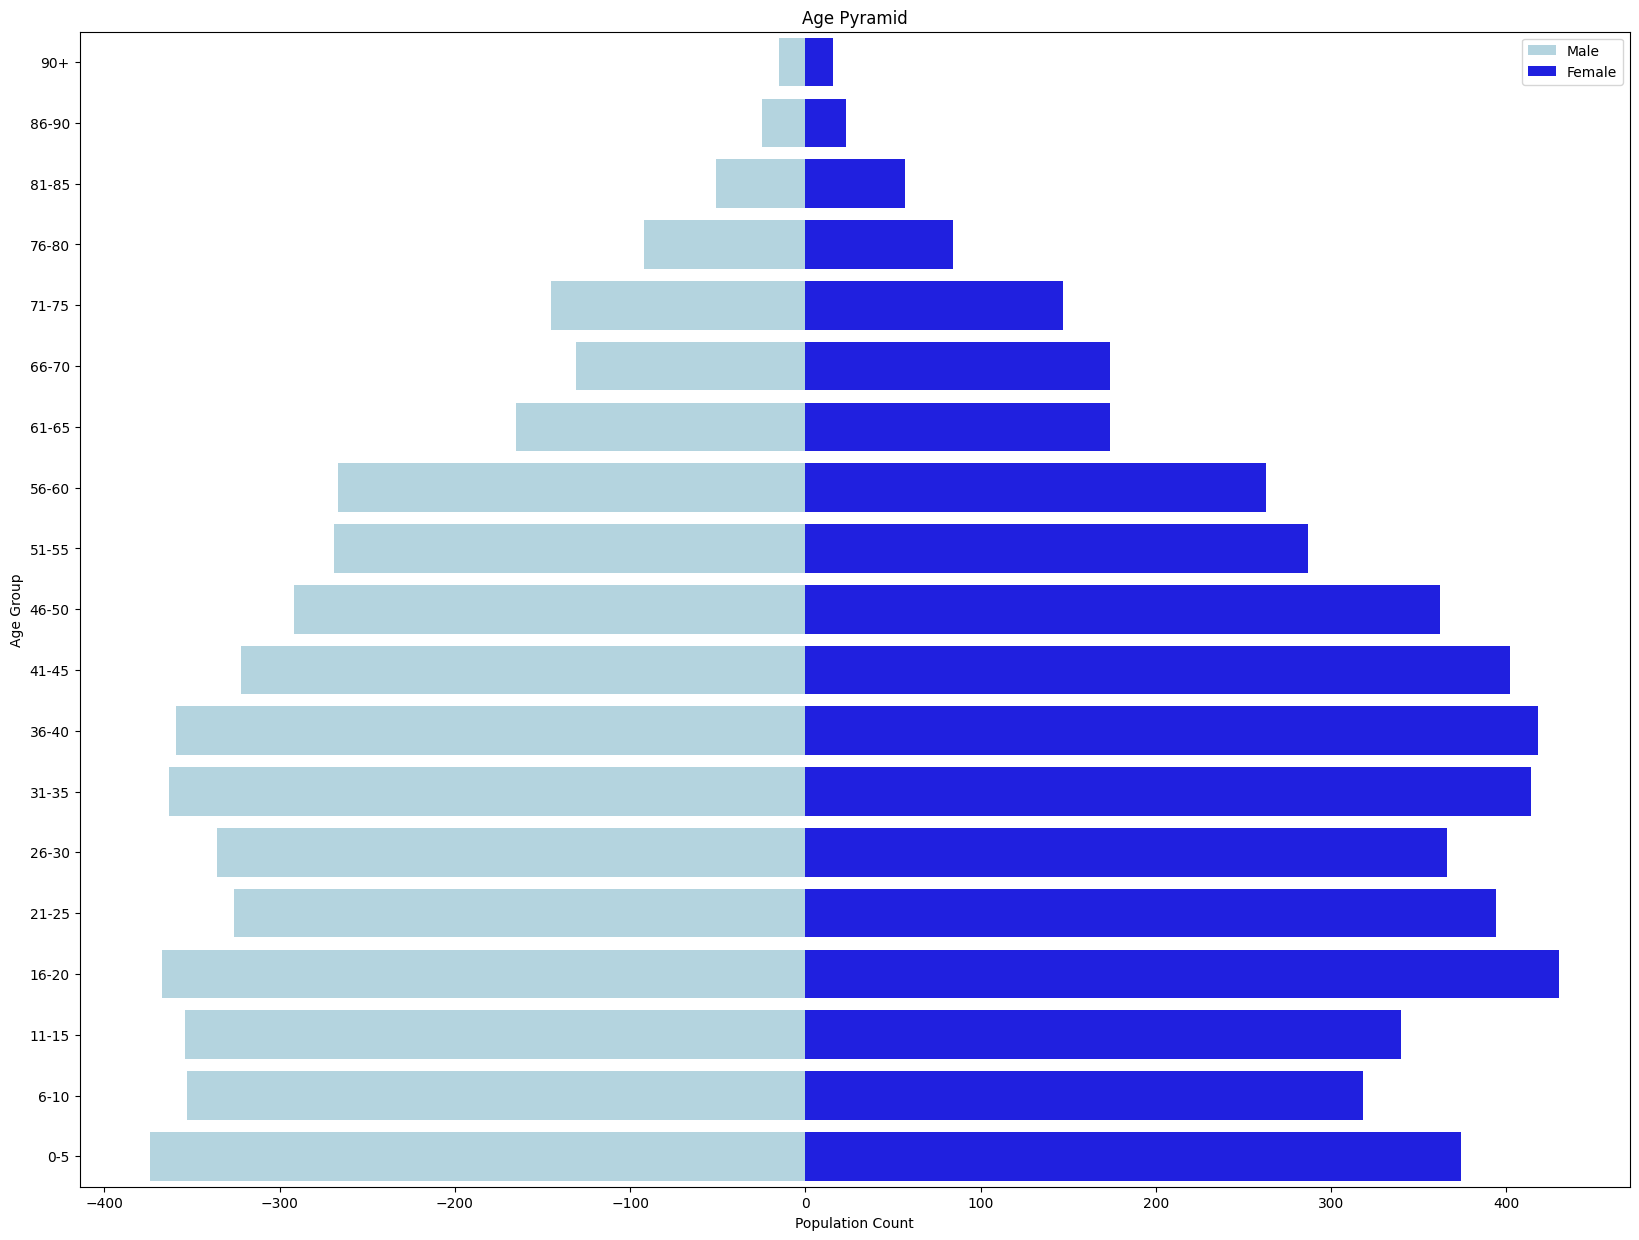

In [149]:
#age pyramid plot

fig = plt.figure(figsize=(20,15))


age_pyramid = sns.barplot(x='Male', y='Age Group', data=pyramid_df, 
                          order=AgeGroupClass,
                         color='lightBlue', label='Male')


age_pyramid = sns.barplot(x='Female', y='Age Group', data=pyramid_df, 
                          order=AgeGroupClass,
                         color='blue', label='Female')

age_pyramid.legend()
age_pyramid.set(xlabel='Population Count', ylabel='Age Group')
plt.title('Age Pyramid')
plt.savefig('./graphs/AgePyramid')

In [150]:
#Total Population

pyramid_df['Total Population'] = np.abs(pyramid_df['Male']) + np.abs(pyramid_df['Female'])

In [151]:
pyramid_df

,Age Group,Male,Female,Total Population
0,90+,-15,16,31
1,86-90,-25,23,48
2,81-85,-51,57,108
3,76-80,-92,84,176
4,71-75,-145,147,292
5,66-70,-131,174,305
6,61-65,-165,174,339
7,56-60,-267,263,530
8,51-55,-269,287,556
9,46-50,-292,362,654


In [152]:
pyramid_df = pyramid_df.iloc[::-1].copy()

In [153]:
pyramid_df

,Age Group,Male,Female,Total Population
18,0-5,-374,374,748
17,6-10,-353,318,671
16,11-15,-354,340,694
15,16-20,-367,430,797
14,21-25,-326,394,720
13,26-30,-336,366,702
12,31-35,-363,414,777
11,36-40,-359,418,777
10,41-45,-322,402,724
9,46-50,-292,362,654


### Birth and Death Rates

[Cohort Study](https://sociologydictionary.org/cohort-study/)

[Age Specific Fertility Rate](https://www.statcan.gc.ca/en/dai/btd/asr)

https://www.data4impactproject.org/prh/family-planning/fertility/age-specific-fertility-rates/

[Conception ages/Fertility Age Group](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/conceptionandfertilityrates/bulletins/conceptionstatistics/2020)
    


*Birth Rate* can be estimated from this data based on age specific fertility rate of the population. This could be done using a age-group cohort. This is done this way because the crude birth rate is calculated using `total resident live births` divided by the `total population`. The total resident live births, however is not captured in this data.

https://www-doh.state.nj.us/doh-shad/view/sharedstatic/CrudeBirthRate.pdf

According to the office of National Statistics, high fertility age group is between age groups 26-30 and 31 -35. Therefore the first cohort would be calculated based on that age group. Women outside this group are fertile and are likely to give birth too. However, this assumption would give an average no of birth for the selected age group and this will be used to compare the previous cohort so that birth rate per 100000 of the population can be calculated. 

In [154]:
#current cohort 26- 30
people_aged_zero = len(df[df['Age']==0])
female_26_30 = len(df[(df['Age'].between(26, 30)) & (df['Gender'] == 'Female')])
current_age_specific_f = (people_aged_zero/female_26_30) * 100_000

print(f"There are {current_age_specific_f:,.0f} births per 100, 000 of the population")

There are 27,869 births per 100, 000 of the population


In [155]:
#current cohort 31- 35
people_aged_five = len(df[df['Age']==5])
female_31_35 = len(df[(df['Age'].between(31, 35)) & (df['Gender'] == 'Female')])
previous_age_specific_f = (people_aged_five/female_31_35) * 100_000

print(f"There are {previous_age_specific_f:,.0f} births per 100, 000 of the population")

There are 37,198 births per 100, 000 of the population


In [156]:
birth_rate = current_age_specific_f - previous_age_specific_f
birth_rate

-9329.215173833847

In [157]:
print(f"Checking the difference in the cohorts, the birth rate is reducing by {-1*(birth_rate):,.0f} people per 100,000 of the population annually.")

Checking the difference in the cohorts, the birth rate is reducing by 9,329 people per 100,000 of the population annually.


### Death Rate

Here too, Death rate will be calculated using **age specific mortality rate**. 

https://www.statcan.gc.ca/en/dai/btd/asr

In [158]:
#calculating population difference
pyramid_df['Diff'] = pyramid_df['Total Population'].diff(1)
pyramid_df['% Change'] = pyramid_df['Total Population'].pct_change()*100

In [159]:
pyramid_df

,Age Group,Male,Female,Total Population,Diff,% Change
18,0-5,-374,374,748,NaN,NaN
17,6-10,-353,318,671,-77.0,-10.294118
16,11-15,-354,340,694,23.0,3.427720
15,16-20,-367,430,797,103.0,14.841499
14,21-25,-326,394,720,-77.0,-9.661230
13,26-30,-336,366,702,-18.0,-2.500000
12,31-35,-363,414,777,75.0,10.683761
11,36-40,-359,418,777,0.0,0.000000
10,41-45,-322,402,724,-53.0,-6.821107
9,46-50,-292,362,654,-70.0,-9.668508


In [160]:
#frame of interest

pyramid_df.iloc[15:]

,Age Group,Male,Female,Total Population,Diff,% Change
3,76-80,-92,84,176,-116.0,-39.726027
2,81-85,-51,57,108,-68.0,-38.636364
1,86-90,-25,23,48,-60.0,-55.555556
0,90+,-15,16,31,-17.0,-35.416667


In [161]:
#current cohort
current_mortality = np.abs(pyramid_df.iloc[15,4])
current_mortality

116.0

In [162]:
current_population = pyramid_df.iloc[14, 3]
current_population

292

In [163]:
#current age specific mortality rate

current_age_mortality = ((current_mortality/5)/current_population) * 100_000
current_age_mortality

7945.205479452054

In [164]:
print(f"There are {current_age_mortality:,.0f} deaths per 100,000 of the population")

There are 7,945 deaths per 100,000 of the population


In [165]:
previous_mortality = np.abs(pyramid_df.iloc[17, 4])
previous_mortality

60.0

In [166]:
previous_population = pyramid_df.iloc[16,3]
previous_population

108

In [167]:
previous_age_mortality = ((previous_mortality/5)/previous_population) * 100_000
previous_age_mortality

11111.111111111111

In [168]:
print(f"There are {previous_age_mortality:,.0f} deaths per 100,000 of the population")

There are 11,111 deaths per 100,000 of the population


In [169]:
death_rate = current_age_mortality - previous_age_mortality
death_rate

-3165.9056316590577

In [170]:
print(f"Comparing the two cohorts, the death rate is reducing by {-1*(death_rate):,.0f} people per 100,000 of the population annually.")

Comparing the two cohorts, the death rate is reducing by 3,166 people per 100,000 of the population annually.


#### Unemployment Trends:

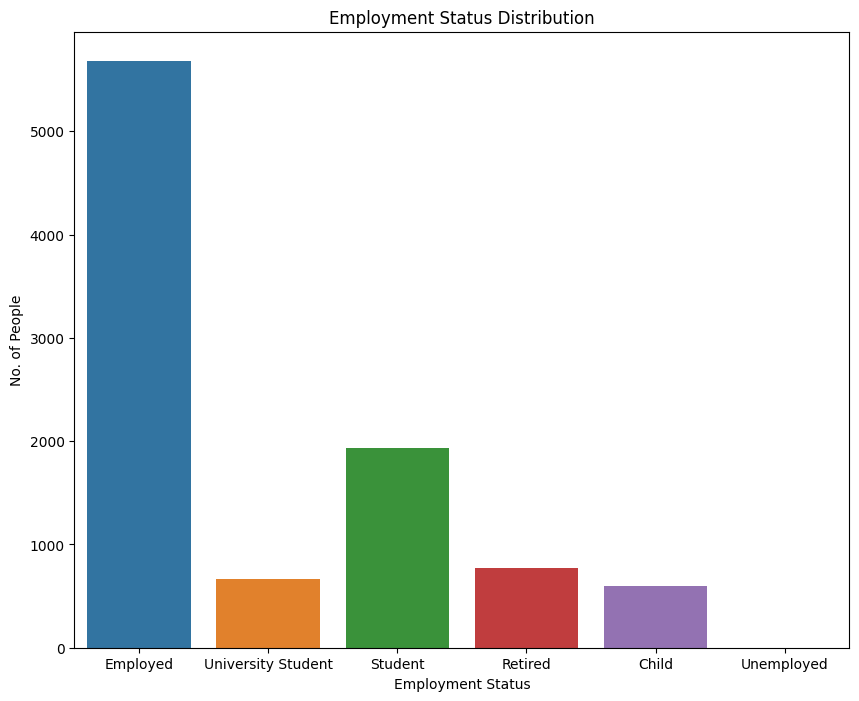

In [171]:

fig = plt.figure(figsize=(10,8))
employment_status = sns.countplot(x="Employment Status", data=df)
employment_status.set_ylabel("No. of People")
plt.title("Employment Status Distribution")
plt.savefig("./graphs/Employment Staus Distribtion")
plt.show()

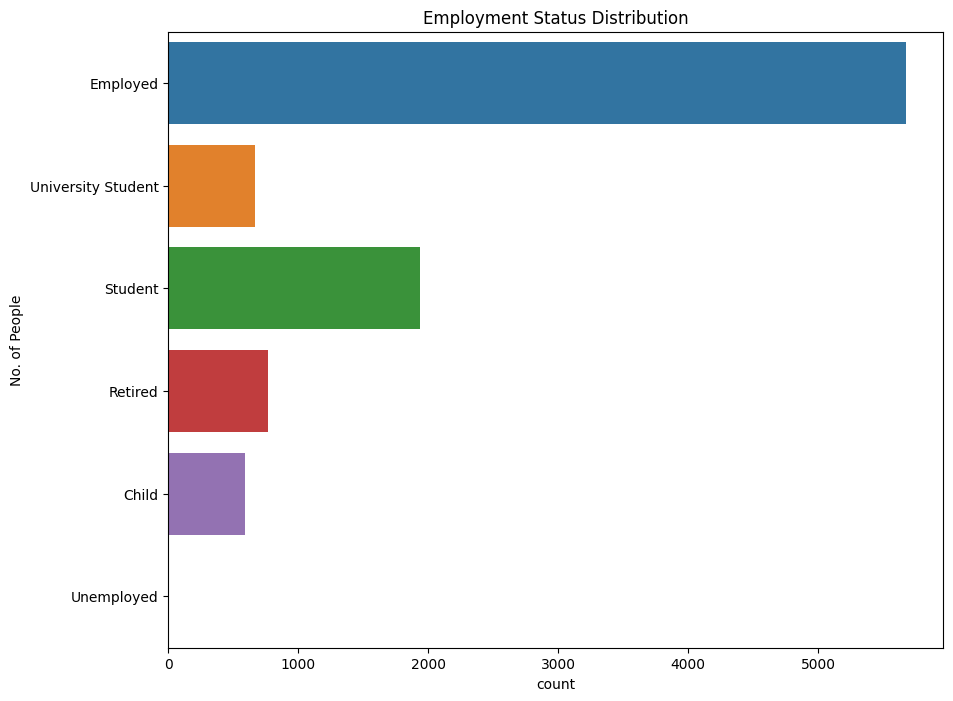

In [172]:

fig = plt.figure(figsize=(10,8))
employment_status = sns.countplot(y="Employment Status", data=df, orient="h")
employment_status.set_ylabel("No. of People")
plt.title("Employment Status Distribution")
plt.savefig("./graphs/Employment Staus Distribtion")
plt.show()

In [173]:
df.loc[(df['Employment Status'] == 'Unemployed') & ((df['Age'] > 18) & (df['Age'] < 60)) ].count()

House Number                     2
Street                           2
First Name                       2
Last Name                        2
Age                              2
Relationship to Head of House    2
Marital Status                   2
Gender                           2
Occupation                       2
Infirmity                        2
Religion                         2
Employment Status                2
Age Group                        2
dtype: int64

In [174]:
df['Employment Status'].value_counts() / len(df) * 100

Employed              58.866204
Student               20.043528
Retired                7.990465
University Student     6.922997
Child                  6.156078
Unemployed             0.020728
Name: Employment Status, dtype: float64

#### Religious Affiliations:

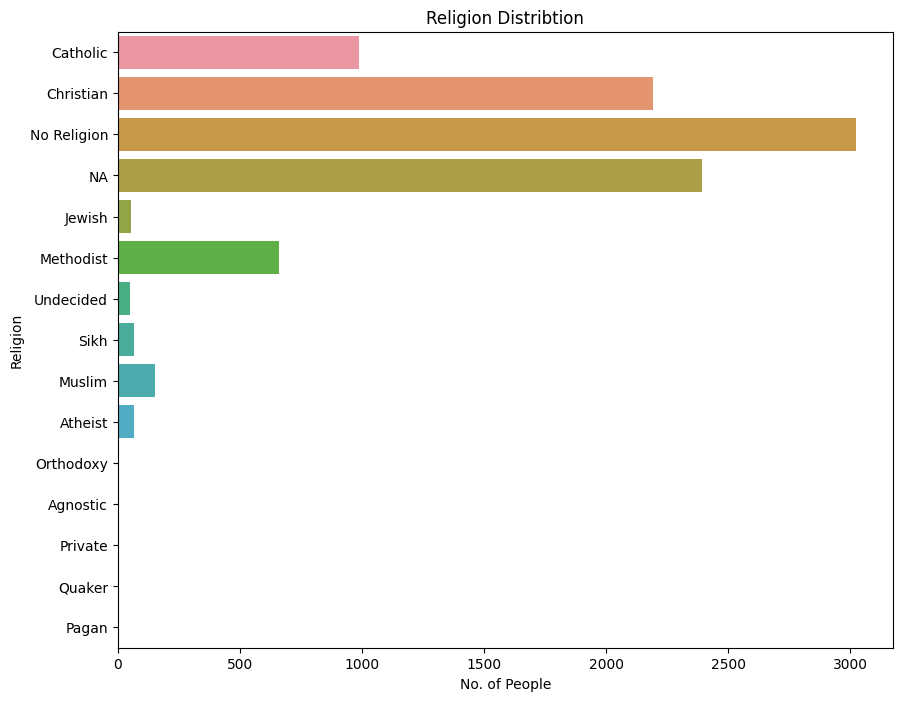

In [175]:
fig = plt.figure(figsize=(10,8))

religion = sns.countplot(y='Religion',data=df, orient="h")
religion.set_xlabel("No. of People")

religion.set_title("Religion Distribtion")
plt.savefig("./graphs/Religion")
plt.show()

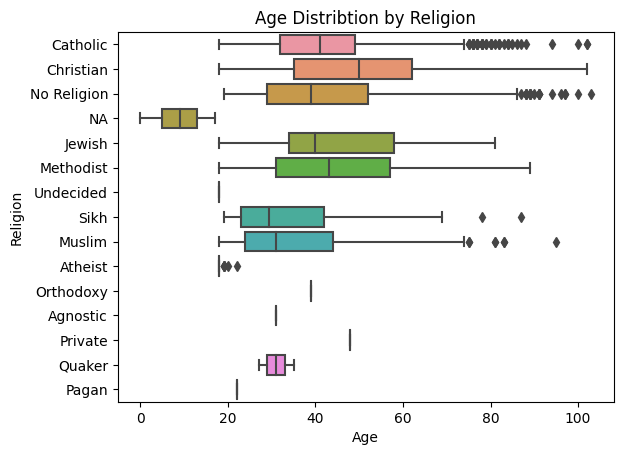

In [176]:
ax2 = sns.boxplot(y='Religion', x='Age', data=df, orient="h")
ax2.set_title("Age Distribtion by Religion")
plt.savefig("./graphs/Religion-Age")
plt.show()

#### Divorce & Marriage Rates:

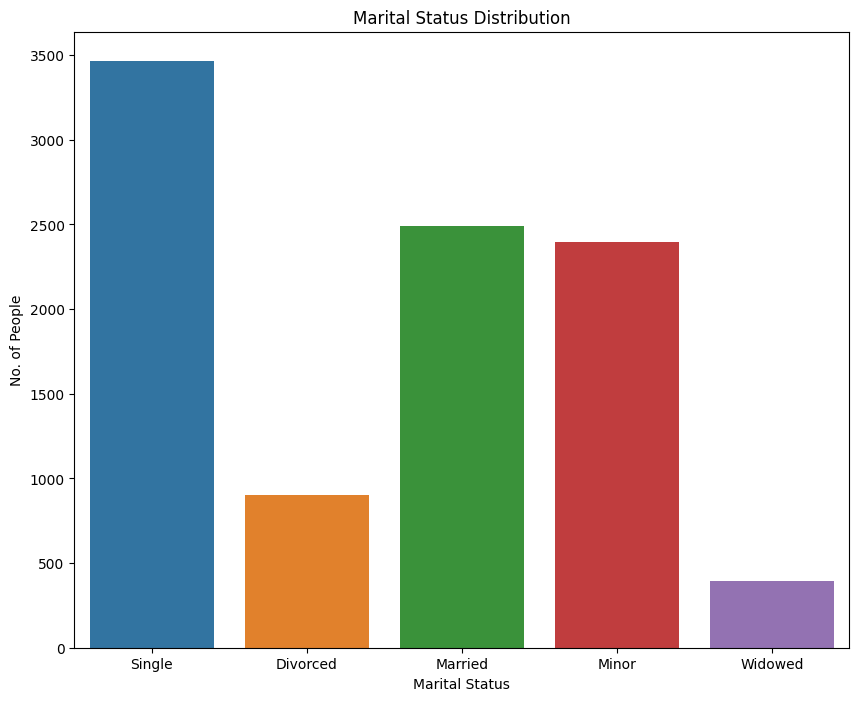

In [177]:
fig = plt.figure(figsize=(10,8))
marital_status = sns.countplot(x="Marital Status", data=df)
marital_status.set_ylabel("No. of People")
plt.title("Marital Status Distribution")
plt.show()

In [178]:
df['Marital Status'].value_counts() / len(df) * 100

Single      35.910457
Married     25.826511
Minor       24.810861
Divorced     9.368847
Widowed      4.083325
Name: Marital Status, dtype: float64

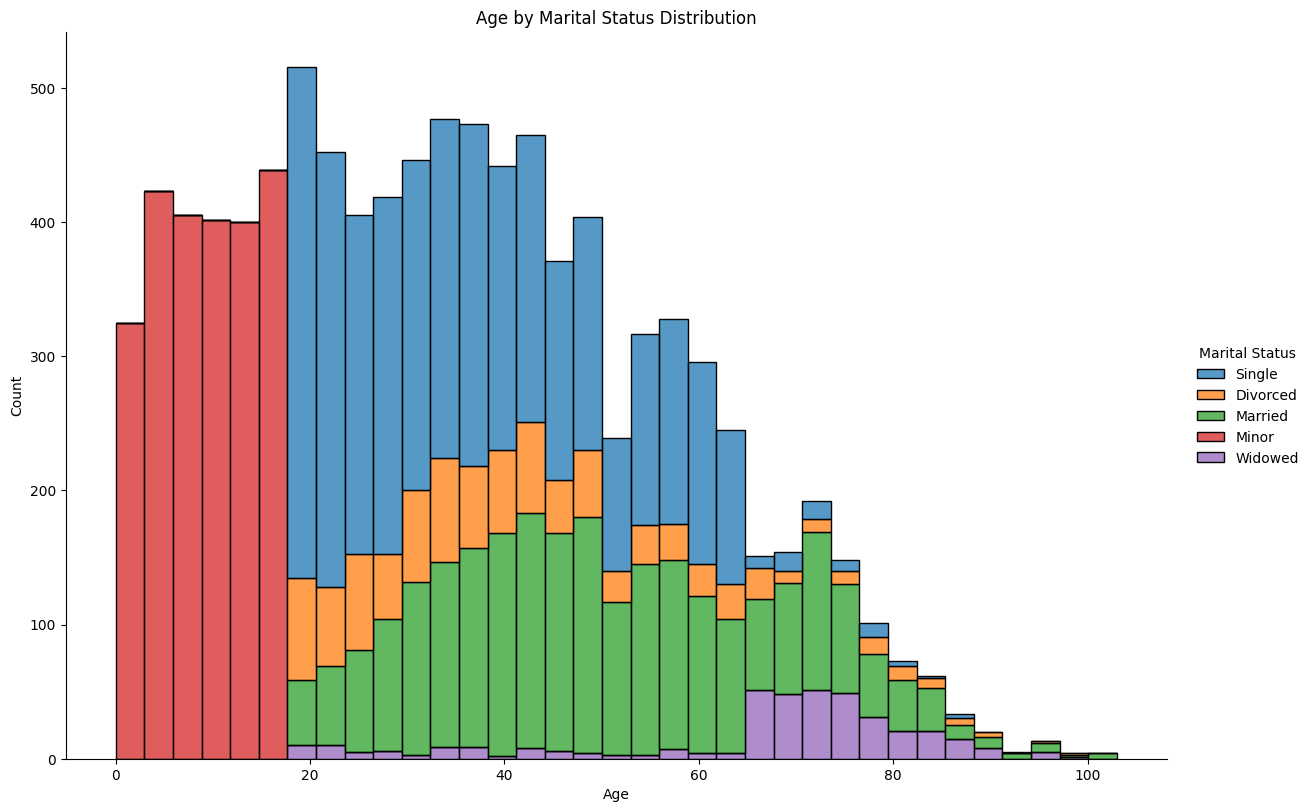

In [179]:
## Age distribution by Marital status
age_marital_status = sns.displot(x='Age', data=df, hue='Marital Status', multiple='stack', height=8, aspect=1.5)
plt.title("Age by Marital Status Distribution")
age_marital_status.savefig('./graphs/Age-Marital Distribution')
plt.show()

#### Occupancy Level:

In [180]:
df['Address'] = df['House Number'].astype(str) + ' ' +  df['Street']

per_household_df = df.groupby(["Address"]).size().reset_index(name="No of Occupants")
# new_df = df.groupby('Address', as_index=False).count()[['House Number', 'Address']]

In [181]:
per_household_df

,Address,No of Occupants
0,1 Ali Harbors,2
1,1 Armagh Longhouse,5
2,1 Ashton Corner,1
3,1 Ball Rest,4
4,1 Barrett Circles,5
...,...,...
3303,99 Barrett Circles,5
3304,99 Canary Glen,4
3305,99 Wales Parks,4
3306,99 West Road,4


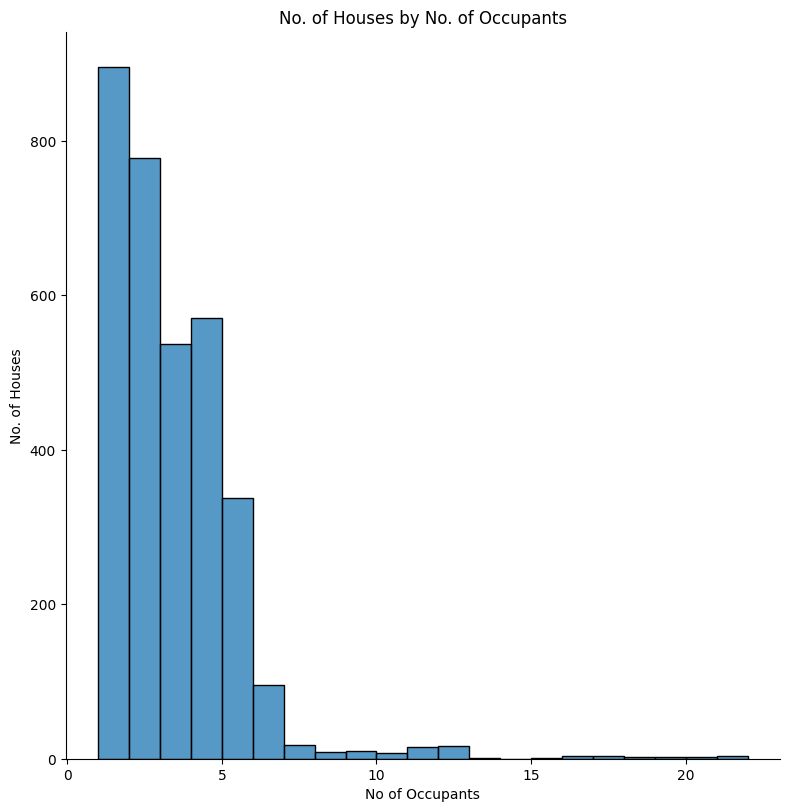

In [182]:
#no. of occupants distribution
no_occupants = sns.displot(x="No of Occupants", data=per_household_df, binwidth=1, height=8, aspect=1.0)
plt.ylabel("No. of Houses")
plt.title("No. of Houses by No. of Occupants")
no_occupants.savefig("./graphs/Occupants-Houses")
plt.show()

In [183]:
per_household_df.groupby('No of Occupants').count()/len(per_household_df)*100

,Address
No of Occupants,
1,27.085852
2,23.518742
3,16.233374
4,17.261185
5,10.217654
6,2.871826
7,0.544135
8,0.272068
9,0.302297


In [184]:
df = df.merge(per_household_df, on='Address')

In [185]:
df

,House Number,Street,First Name,Last Name,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Age Group,Address,No of Occupants
0,1,Orryjar Lane,Kieran,Ward,56,Head,Single,Male,Careers adviser,No Disability,Catholic,Employed,56-60,1 Orryjar Lane,2
1,1,Orryjar Lane,Abdul,Pickering,43,None,Single,Male,Public relations account executive,No Disability,Christian,Employed,41-45,1 Orryjar Lane,2
2,2,Orryjar Lane,Rosemary,Steele,30,Head,Single,Female,Meteorologist,No Disability,Christian,Employed,26-30,2 Orryjar Lane,1
3,3,Orryjar Lane,Marilyn,Cooke,53,Head,Single,Female,Jewellery designer,No Disability,Christian,Employed,51-55,3 Orryjar Lane,1
4,4,Orryjar Lane,Samantha,Coates,63,Head,Single,Female,Trade mark attorney,No Disability,No Religion,Employed,61-65,4 Orryjar Lane,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,1,Armagh Longhouse,Diana,Yates,39,Head,Divorced,Female,Unemployed,Physical Disability,Methodist,Employed,36-40,1 Armagh Longhouse,5
9645,1,Armagh Longhouse,Aaron,Yates,6,Son,Minor,Male,Student,No Disability,NA,Student,6-10,1 Armagh Longhouse,5
9646,1,Armagh Longhouse,Geraldine,Yates,3,Daughter,Minor,Female,Child,No Disability,NA,Child,0-5,1 Armagh Longhouse,5
9647,1,Armagh Longhouse,Daniel,Yates,1,Son,Minor,Male,Child,No Disability,NA,Child,0-5,1 Armagh Longhouse,5


So as to understand the housing situation and decide if there is a demand for more housing, we use the mode of occupants per street to compare the mean value. This should help us to determine the high and low occupancy level in the town.

We are assuming that the town contains the same number of houses per street and that the houses have almost same sizes.

In [186]:
#dataframe aggregation
household_df = df.groupby('Street').agg(
    ModeOccupant=pd.NamedAgg(column='No of Occupants', aggfunc=lambda x:x.value_counts().index[0]),
    MeanOccupant=pd.NamedAgg(column='No of Occupants', aggfunc='mean')).reset_index()
household_df['Occupancy Level'] = np.where(household_df["MeanOccupant"]<=household_df["ModeOccupant"], "Low", "High")

This grouping is done with reference to this [solution](https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value) on stackoverflow.

In [187]:
household_df.head(20)

,Street,ModeOccupant,MeanOccupant,Occupancy Level
0,Ali Harbors,2,1.784810,Low
1,Armagh Longhouse,5,5.000000,Low
2,Ashton Corner,1,1.962963,High
3,Ball Rest,4,4.133333,High
4,Barrett Circles,5,9.455378,High
5,Barry Rectory,6,6.000000,Low
6,Bastille Keep,5,5.000000,Low
7,Bentley Forges,1,1.775510,High
8,Bishop Avenue,2,3.363636,High
9,Black Causeway,2,1.897959,Low


In [188]:
#merging occupancy level to original dataframe.
df = df.merge(household_df, on='Street')

In [189]:
df = df.drop(columns=['MeanOccupant', 'ModeOccupant'])

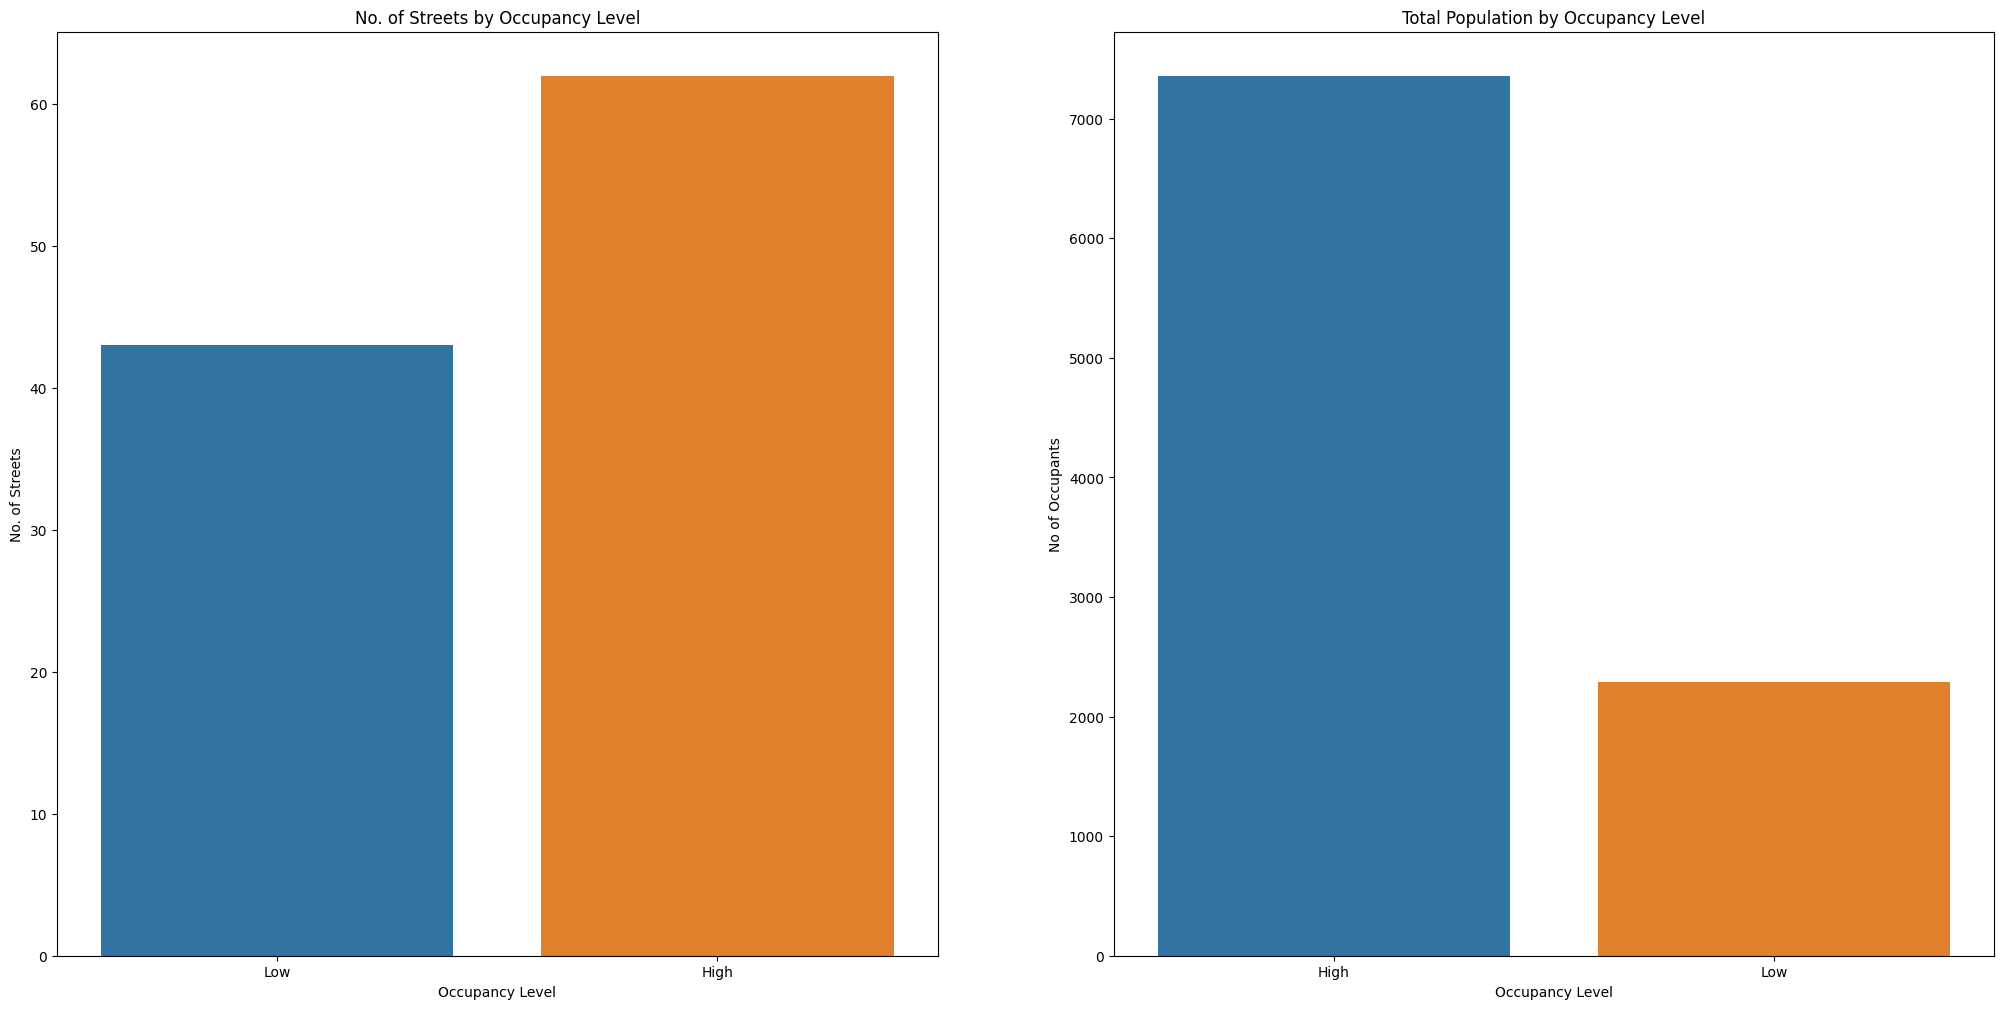

In [190]:
fig, axes = plt.subplots(figsize=(25,12), ncols=2, nrows=1)

ax1 = sns.countplot(x='Occupancy Level', data=household_df, ax=axes[0])
ax2 = sns.barplot(x="Occupancy Level", y="No of Occupants", data=df.groupby("Occupancy Level", as_index=False).count(), ax=axes[1])

ax1.set_ylabel("No. of Streets")

ax1.set_title("No. of Streets by Occupancy Level")
ax2.set_title("Total Population by Occupancy Level")
plt.savefig("./graphs/Occupancy Level")
plt.show()

### Infirmity

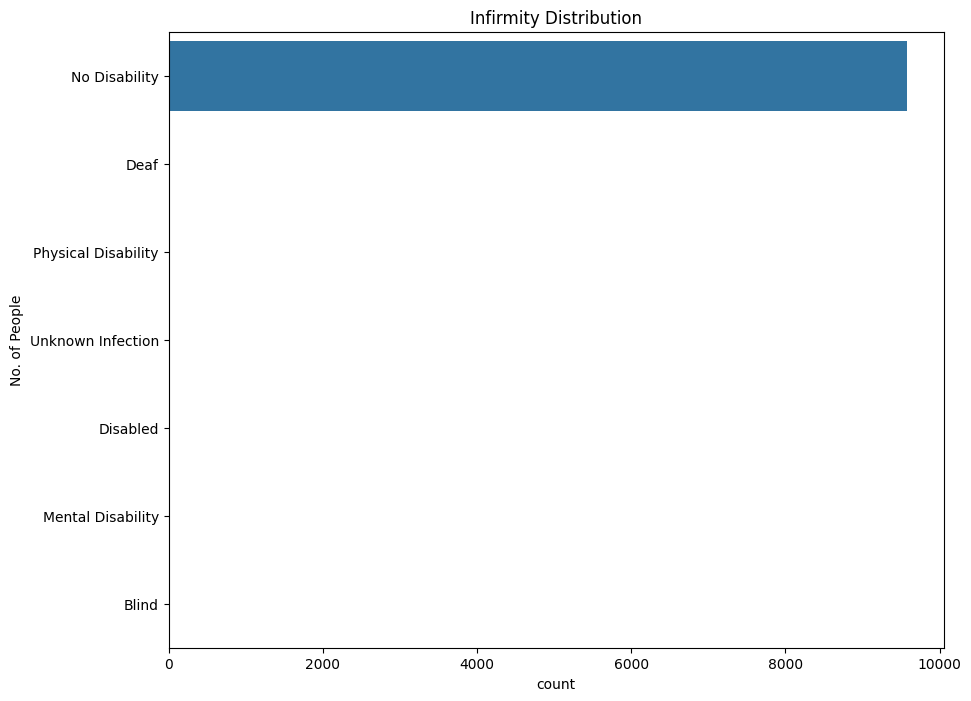

In [191]:
fig = plt.figure(figsize=(10,8))
infirmity_status = sns.countplot(y="Infirmity", data=df, orient="h" )
infirmity_status.set_ylabel("No. of People")
plt.title("Infirmity Distribution")
plt.savefig("./graphs/Infirmity Distribtion")
plt.show()

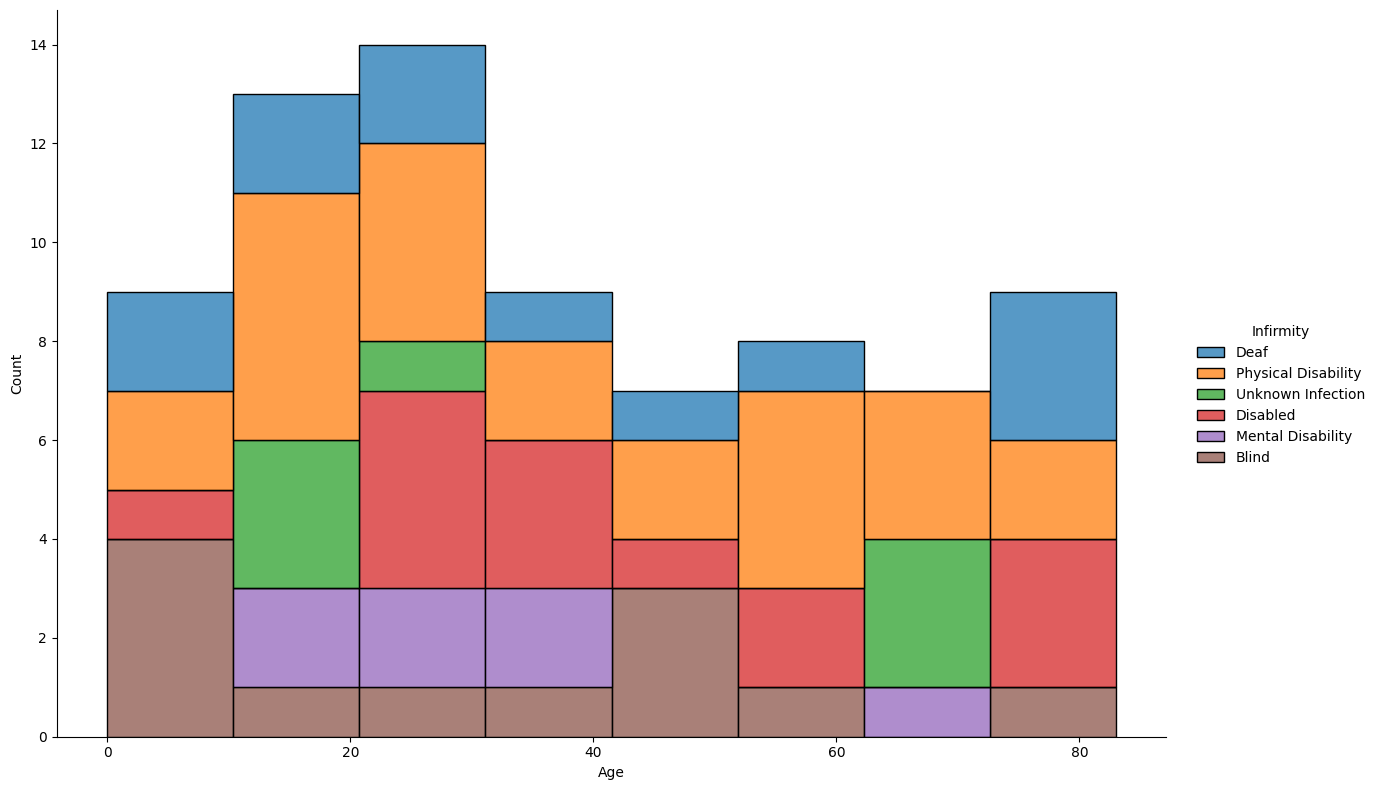

In [192]:
# Is Infirmity peculiar to an age range?
sns.displot(x='Age', data=df.loc[df["Infirmity"]!='No Disability'], hue="Infirmity", multiple='stack', height=8, aspect=1.5)
plt.savefig("./graphs/Infirmity by age Distribtion")
plt.show()


In [193]:
df['Infirmity'].value_counts() / len(df) * 100

No Disability          99.212354
Physical Disability     0.248730
Disabled                0.145093
Deaf                    0.124365
Blind                   0.124365
Unknown Infection       0.072546
Mental Disability       0.072546
Name: Infirmity, dtype: float64

In [194]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 9648
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9649 non-null   int32 
 1   Street                         9649 non-null   object
 2   First Name                     9649 non-null   object
 3   Last Name                      9649 non-null   object
 4   Age                            9649 non-null   int32 
 5   Relationship to Head of House  9649 non-null   object
 6   Marital Status                 9649 non-null   object
 7   Gender                         9649 non-null   object
 8   Occupation                     9649 non-null   object
 9   Infirmity                      9649 non-null   object
 10  Religion                       9649 non-null   object
 11  Employment Status              9649 non-null   object
 12  Age Group                      9649 non-null   object
 13  Add

In [195]:
df.describe()

,House Number,Age,No of Occupants
count,9649.000000,9649.000000,9649.000000
mean,37.123018,35.004767,4.454659
std,38.955750,21.416015,3.466590
min,1.000000,0.000000,1.000000
25%,10.000000,18.000000,2.000000
50%,23.000000,34.000000,4.000000
75%,48.000000,50.000000,5.000000
max,172.000000,103.000000,22.000000
